#A. Data Preparation

Nama        : Faqih Muhammad Ihsan

Email       : faqihmuhamad876@gmail.com

cohort_id   : MC491D5Y1144



1. Menggunakan algoritma deep learning di luar dari contoh latihan.

**DONE: menggunakan LSTM**

2. Akurasi pada training set dan testing set di atas 92%.

**DONE: menggunakan SVM dan LSTM DIATAS 92%**

3. Dataset memiliki minimal tiga kelas.

**Done: memiliki 3 kelas ,yaitu positif, negative, dan neutral**

4. Memiliki jumlah data minimal 10.000 sampel data.

**Done: Memiliki data awal 18695 hasil scraping dari ulasan apk dan setelah penghapusan nilai nan**

5. Melakukan 3 percobaan skema pelatihan yang berbeda. Skema ini dapat dibedakan dari variasi algoritma pelatihan, metode ekstraksi fitur, pelabelan dan pembagian data dengan memilih minimal 2 kombinasi.

**Done:diperoleh 6 model percobaan skema yang berbeda**

*   **melakukan pembagian data 80% dan 70% pada train**
*   **variasi algoritma: SVM dan LSTM**
*   **Ekstrasi fitur: tensorflow dan TfIdf**



6. Melakukan inference atau testing dalam file .ipynb atau .py yang menghasilkan output berupa kelas kategorikal (contoh: negatif, netral, dan positif).

**Done : Sudah menghasilkan output Negative dan neutral**



In [4]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df ='/content/drive/MyDrive/Colab Notebooks/NLP_Scrapping_dicoding/ulasan_pemodelan.csv'
clean_df =pd.read_csv(df)
clean_df.head()

content  score
0  Aplikasi yg bagus bagi pemula sangat mudah sek...      5
1  Aplikasi nya bagus dan sangat mudah digunakan ...      5
2  Aplikasi trading crypto yang simpel, aman, dan...      5
3  Pintu adalah aplikasi crypto terbaik buat pemu...      5
4  Aplikasi Pintu sangat mudah digunakan dan memb...      5

In [6]:
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18695 entries, 0 to 18694
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  18695 non-null  object
 1   score    18695 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 292.2+ KB


In [7]:
clean_df.shape

(18695, 2)

#B. Text Preprocessing

## B.1 Cleaning and Tokenizing

In [8]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "tpi":"tapi","tp":"tapi","ktolong":"ka tolong","g":"tidak","anjiiiing":"umpat","knp":"kenapa","tibatiba":"tiba-tiba","ad":"ada",
              "tbtb":"tiba-tiba","yt":"youtube","ig":"instagram","gk":"tidak","yg":"yang","moga":"semoga","pake":"pakai","ngirim":"kirim",
              "muas":"puas","sdh":"sudah","lg":"lagi","sya":"saya","klo":"kalau","knpa":"kenapa","tdk":"tidak","sampe":"sampai","kayak":"seperti",
              "cuman":"hanya","prose":"proses","ny":"","jd":"jadi","dgn":"dengan","jg":"juga","tf":"transfer","sampe":"sampai","ngirim":"kirim",
              "bagu":"bagus","skrg":"sekarang","nunggu":"tunggu","udah":"sudah","uda":"sudah","pk":"pakai","@": "di", "abis": "habis", "wtb": "beli",
              "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia",
              "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah",
              "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
              "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa",
              "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik",
              "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
              "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur",
              "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar",
              "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana",
              "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar",
              "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
              "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur",
              "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi",
              "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja",
              "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
              "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor",
              "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
              "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan",
              "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian",
              "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile",
              "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan",
              "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi",
              "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda",
              "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo",
              "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh",
              "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi",
              "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus",
              "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah",
              "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba",
              "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras",
              "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual",
              "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [9]:
import re
import string
import Sastrawi
import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Menghapus stopwords dalam teks
listStopwords = set(stopwords.words('indonesian')+ stopwords.words('english'))
listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","anjay","gk","g"])

def cleaningText(text):
    text = str(text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    text = text.lower() #mengubah menjadi huruf kecil
    return text

def tokenizingText(text):
    text1 = text.split()  # split
    text = [w for w in text1 if not w in listStopwords]
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_clean'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText1'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_tokenizingText'] = clean_df['text_tokenizingText1'].apply(' '.join)

# Gabungkan semua teks menjadi satu string panjang
hasil = " ".join(clean_df['text_tokenizingText'])


In [11]:
clean_df.head()

content  score  \
0  Aplikasi yg bagus bagi pemula sangat mudah sek...      5   
1  Aplikasi nya bagus dan sangat mudah digunakan ...      5   
2  Aplikasi trading crypto yang simpel, aman, dan...      5   
3  Pintu adalah aplikasi crypto terbaik buat pemu...      5   
4  Aplikasi Pintu sangat mudah digunakan dan memb...      5   

                                          text_clean  \
0  aplikasi yg bagus bagi pemula sangat mudah sek...   
1  aplikasi nya bagus dan sangat mudah digunakan ...   
2  aplikasi trading crypto yang simpel aman dan c...   
3  pintu adalah aplikasi crypto terbaik buat pemu...   
4  aplikasi pintu sangat mudah digunakan dan memb...   

                                     text_slangwords  \
0  aplikasi yang bagus bagi pemula sangat mudah s...   
1  aplikasi nya bagus dan sangat mudah digunakan ...   
2  aplikasi trading crypto yang simpel aman dan c...   
3  pintu adalah aplikasi crypto terbaik buat pemu...   
4  aplikasi pintu sangat mudah digunakan dan memb...   

                                text_tokenizingText1  \
0  [aplikasi, bagus, pemula, mudah, verifikasi, f...   
1  [aplikasi, bagus, mudah, pemula, investasi, cr...   
2  [aplikasi, trading, crypto, simpel, aman, coco...   
3  [pintu, aplikasi, crypto, terbaik, pemula, uin...   
4  [aplikasi, pintu, mudah, membantu, mengelola, ...   

                                 text_tokenizingText  
0  aplikasi bagus pemula mudah verifikasi fitur f...  
1  aplikasi bagus mudah pemula investasi crypto p...  
2  aplikasi trading crypto simpel aman cocok pemu...  
3  pintu aplikasi crypto terbaik pemula uinya ber...  
4  aplikasi pintu mudah membantu mengelola keuang...

## B.2 Stemming

In [12]:
from nltk.stem import PorterStemmer
# create stemmer and process stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
#menyimpan hasil stemming di kolom stemmed
clean_df["stemmed"] = clean_df["text_tokenizingText1"].apply(lambda word: [stemmer.stem(y) for y in word])
clean_df.head()

content  score  \
0  Aplikasi yg bagus bagi pemula sangat mudah sek...      5   
1  Aplikasi nya bagus dan sangat mudah digunakan ...      5   
2  Aplikasi trading crypto yang simpel, aman, dan...      5   
3  Pintu adalah aplikasi crypto terbaik buat pemu...      5   
4  Aplikasi Pintu sangat mudah digunakan dan memb...      5   

                                          text_clean  \
0  aplikasi yg bagus bagi pemula sangat mudah sek...   
1  aplikasi nya bagus dan sangat mudah digunakan ...   
2  aplikasi trading crypto yang simpel aman dan c...   
3  pintu adalah aplikasi crypto terbaik buat pemu...   
4  aplikasi pintu sangat mudah digunakan dan memb...   

                                     text_slangwords  \
0  aplikasi yang bagus bagi pemula sangat mudah s...   
1  aplikasi nya bagus dan sangat mudah digunakan ...   
2  aplikasi trading crypto yang simpel aman dan c...   
3  pintu adalah aplikasi crypto terbaik buat pemu...   
4  aplikasi pintu sangat mudah digunakan dan memb...   

                                text_tokenizingText1  \
0  [aplikasi, bagus, pemula, mudah, verifikasi, f...   
1  [aplikasi, bagus, mudah, pemula, investasi, cr...   
2  [aplikasi, trading, crypto, simpel, aman, coco...   
3  [pintu, aplikasi, crypto, terbaik, pemula, uin...   
4  [aplikasi, pintu, mudah, membantu, mengelola, ...   

                                 text_tokenizingText  \
0  aplikasi bagus pemula mudah verifikasi fitur f...   
1  aplikasi bagus mudah pemula investasi crypto p...   
2  aplikasi trading crypto simpel aman cocok pemu...   
3  pintu aplikasi crypto terbaik pemula uinya ber...   
4  aplikasi pintu mudah membantu mengelola keuang...   

                                             stemmed  
0  [aplikasi, bagus, mula, mudah, verifikasi, fit...  
1  [aplikasi, bagus, mudah, mula, investasi, cryp...  
2  [aplikasi, trading, crypto, simpel, aman, coco...  
3  [pintu, aplikasi, crypto, baik, mula, uinya, b...  
4  [aplikasi, pintu, mudah, bantu, kelola, uang, ...

In [14]:
#kata yang sudah di stemming disatukan menjadi satu kalimat dan mengubah tipe objt ke str pada text akhir
clean_df["text_akhir"] = clean_df["stemmed"].apply(lambda x: " ".join([item for item in x]))
clean_df['text_akhir'] = clean_df['text_akhir'].astype('str')
clean_df['text_akhir']= clean_df['text_akhir'].astype(pd.StringDtype())
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18695 entries, 0 to 18694
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               18695 non-null  object
 1   score                 18695 non-null  int64 
 2   text_clean            18695 non-null  object
 3   text_slangwords       18695 non-null  object
 4   text_tokenizingText1  18695 non-null  object
 5   text_tokenizingText   18695 non-null  object
 6   stemmed               18695 non-null  object
 7   text_akhir            18695 non-null  string
dtypes: int64(1), object(6), string(1)
memory usage: 1.1+ MB


## B.3 Labeling Sentimen

In [15]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [16]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0 # Mulai dengan skor sentimen 0
    for word in text:# Mengulangi setiap kata dalam teks
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata termasuk dalam kamus yang memiliki makna positif, skornya ditambah ke skor sentimen.

    for word in text:# Mengulangi setiap kata dalam teks (sekali lagi)
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]# Kurangkan skor sentimen jika kata termasuk dalam kamus yang memiliki arti negatif.
    polarity=''
    sentimen=''
    # Variable polaritas
    if (score > 0):
        polarity = 'positive'
        sentimen = 1
        # Polaritas adalah positif ketika skor sentimen lebih besar dari 0.
    elif (score < 0):
        polarity = 'negative'
        sentimen = -1
        # Polaritas adalah negatif jika skor sentimen kurang dari 0.
    else:
        polarity = 'neutral'# Nilai polaritas netral sama dengan 0.
        sentimen = 0
    return score, polarity, sentimen #Mengembalikan polaritas teks dan skor sentimen

In [17]:
results = clean_df['stemmed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
clean_df['sentiment'] = results[2]
print(clean_df['polarity'].value_counts())

polarity
positive    8981
negative    6815
neutral     2899
Name: count, dtype: int64


In [18]:
clean_df.head(3)

content  score  \
0  Aplikasi yg bagus bagi pemula sangat mudah sek...      5   
1  Aplikasi nya bagus dan sangat mudah digunakan ...      5   
2  Aplikasi trading crypto yang simpel, aman, dan...      5   

                                          text_clean  \
0  aplikasi yg bagus bagi pemula sangat mudah sek...   
1  aplikasi nya bagus dan sangat mudah digunakan ...   
2  aplikasi trading crypto yang simpel aman dan c...   

                                     text_slangwords  \
0  aplikasi yang bagus bagi pemula sangat mudah s...   
1  aplikasi nya bagus dan sangat mudah digunakan ...   
2  aplikasi trading crypto yang simpel aman dan c...   

                                text_tokenizingText1  \
0  [aplikasi, bagus, pemula, mudah, verifikasi, f...   
1  [aplikasi, bagus, mudah, pemula, investasi, cr...   
2  [aplikasi, trading, crypto, simpel, aman, coco...   

                                 text_tokenizingText  \
0  aplikasi bagus pemula mudah verifikasi fitur f...   
1  aplikasi bagus mudah pemula investasi crypto p...   
2  aplikasi trading crypto simpel aman cocok pemu...   

                                             stemmed  \
0  [aplikasi, bagus, mula, mudah, verifikasi, fit...   
1  [aplikasi, bagus, mudah, mula, investasi, cryp...   
2  [aplikasi, trading, crypto, simpel, aman, coco...   

                                          text_akhir  polarity_score  \
0  aplikasi bagus mula mudah verifikasi fitur fit...              -7   
1  aplikasi bagus mudah mula investasi crypto pin...              -5   
2  aplikasi trading crypto simpel aman cocok mula...              11   

   polarity  sentiment  
0  negative         -1  
1  negative         -1  
2  positive          1

In [19]:
clean_df.columns

Index(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText', 'stemmed', 'text_akhir',
       'polarity_score', 'polarity', 'sentiment'],
      dtype='object')

In [20]:
#menghapus yang tidak difgunakan dalam pemodelan
df_fix = clean_df.drop(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText'], axis =1)

In [21]:
df_fix.columns

Index(['stemmed', 'text_akhir', 'polarity_score', 'polarity', 'sentiment'], dtype='object')

In [22]:
df_fix.shape

(18695, 5)

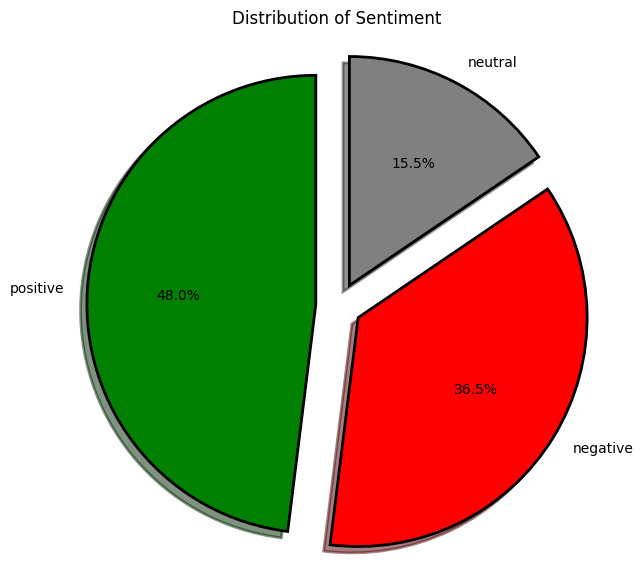

In [23]:
# Pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7, 7))
colors = ('green', 'red', 'grey')  # positive, negative, neutral
wp = {'linewidth': 2, 'edgecolor': 'black'}

tags = df_fix['polarity'].value_counts()
explode = (0.1, 0.1, 0.1)

tags.plot(
    kind='pie',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    explode=explode,
    label=''
)

plt.title('Distribution of Sentiment')
plt.axis('equal')  # Diagramnya lingkaran
plt.show()

Penjelasan:

Memanfaatkan kamus sentimen (lexicon) dari GitHub, saya menemukan bahwa distribusi sentimen dalam ulasan aplikasi Pintu adalah sebagai berikut:

Jumlah tanggapan buruk sebesar 36,5% menunjukkan bahwa beberapa pengguna menyatakan keluhan, kritik, atau pengalaman tidak menyenangkan saat menggunakan aplikasi.

Sensimen positif sebesar 48.0% menunjukkan bahwa kebanyakan pengguna puas dan menyukai fitur dan layanan aplikasi Pintu.

Beberapa pengguna memberikan ulasan yang deskriptif atau tidak menunjukkan kecenderungan emosional positif atau negatif, menurut sentimen netral sebesar 15,5%.


## B.4 Visualisasi

### B.4.1 Wordcloud and distribusi word Positive

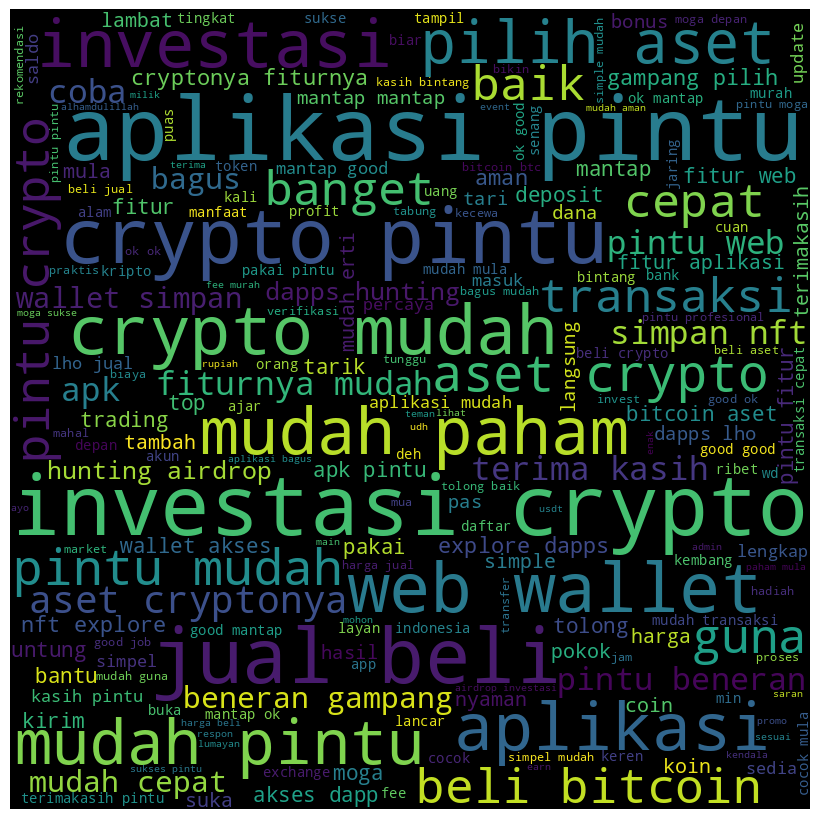

In [24]:
text1 = " ".join(df_fix[df_fix['polarity'] == 'positive']['text_akhir'])

# Membuat WordCloud
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='black',
    min_font_size=10
).generate(text1)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

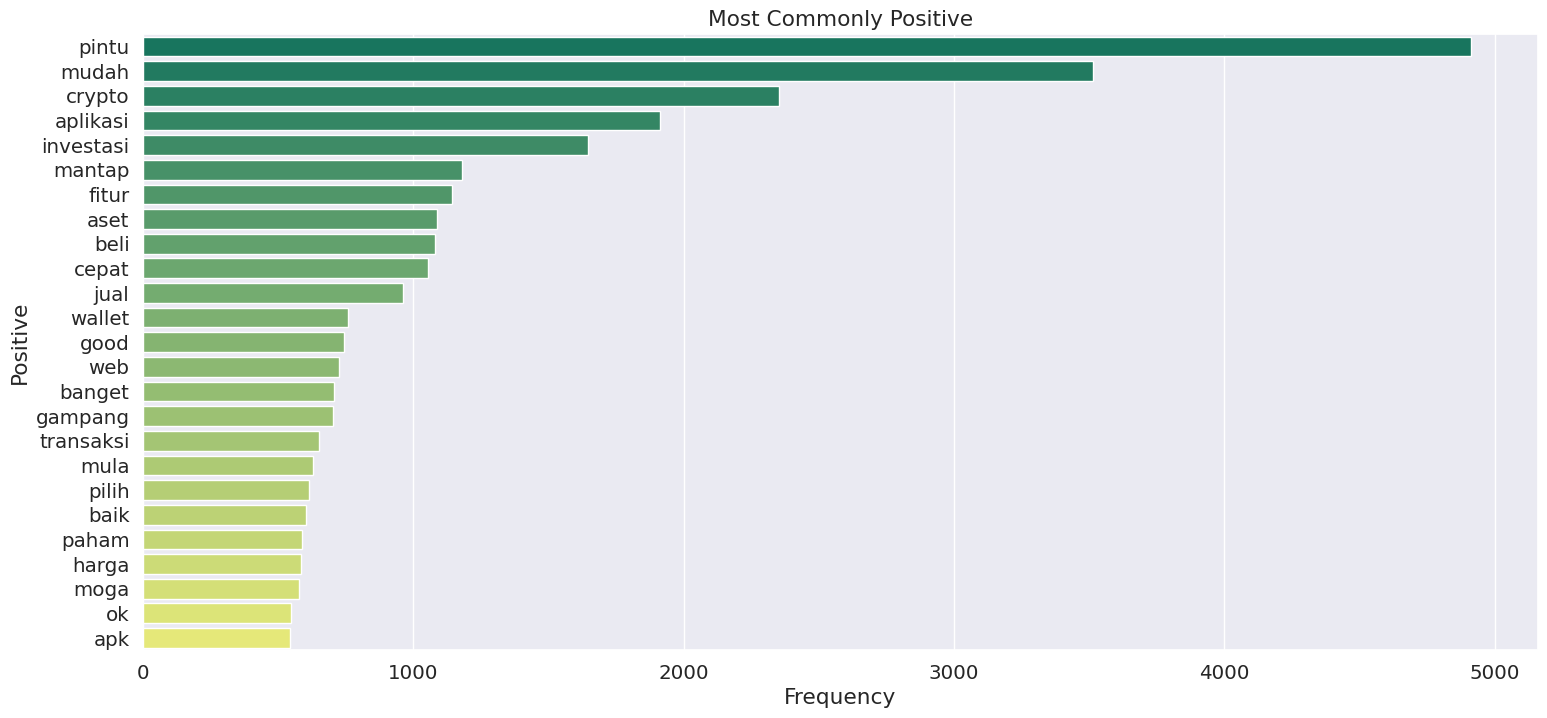

In [25]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words = []
for sentence in df_fix[df_fix['sentiment'] == 1]['text_akhir'].to_list():
    for word in sentence.split():
        all_words.append(word)

df1 = pd.DataFrame(Counter(all_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Positive")
plt.xlabel("Frequency")
plt.ylabel("Positive")
plt.show()

Penjelasan:  

Dari worldcloud diperoleh bahwa kata `pintu, mudah, crypto, aplikasi, investasi, mantap, fitur, aset, beli, cepat, jual, wallet, good, web, banget, gampang, transaksi, mula, pilih, baik, paham, harga, moga, ok, dan apk` merupakan kata yang banyak digunakan dalam ulasan berlabel sentimen positif.

### B.4.2 Wordcloud and distribusi word negative

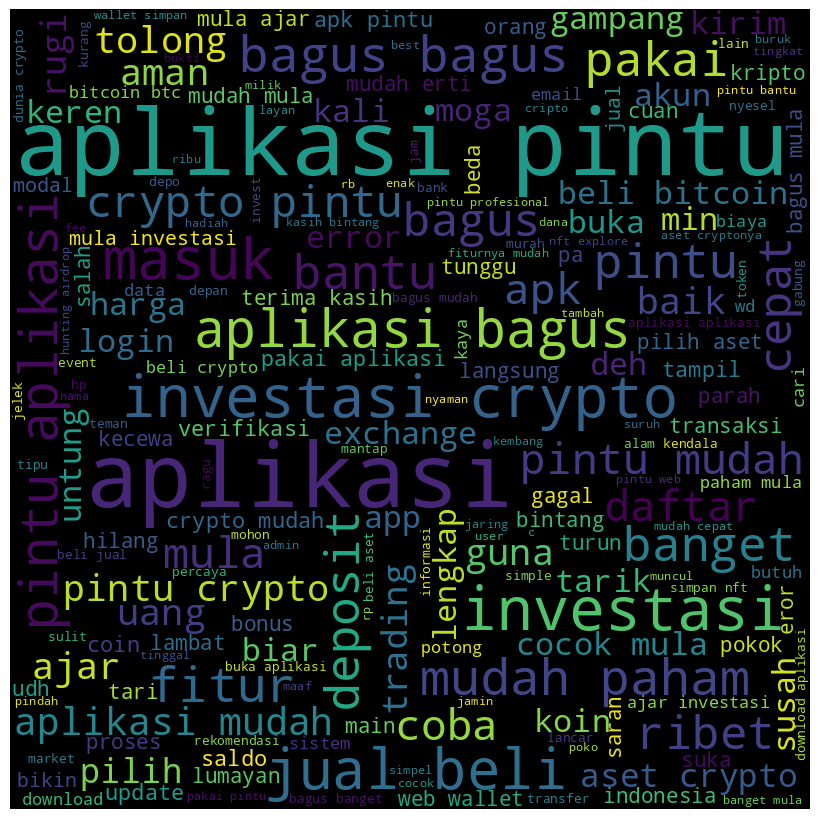

In [26]:
text3 = " ".join(df_fix[df_fix['polarity'] == 'negative']['text_akhir'])

# membuat wordcloud
wordcloud = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    min_font_size = 10
).generate(text3)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


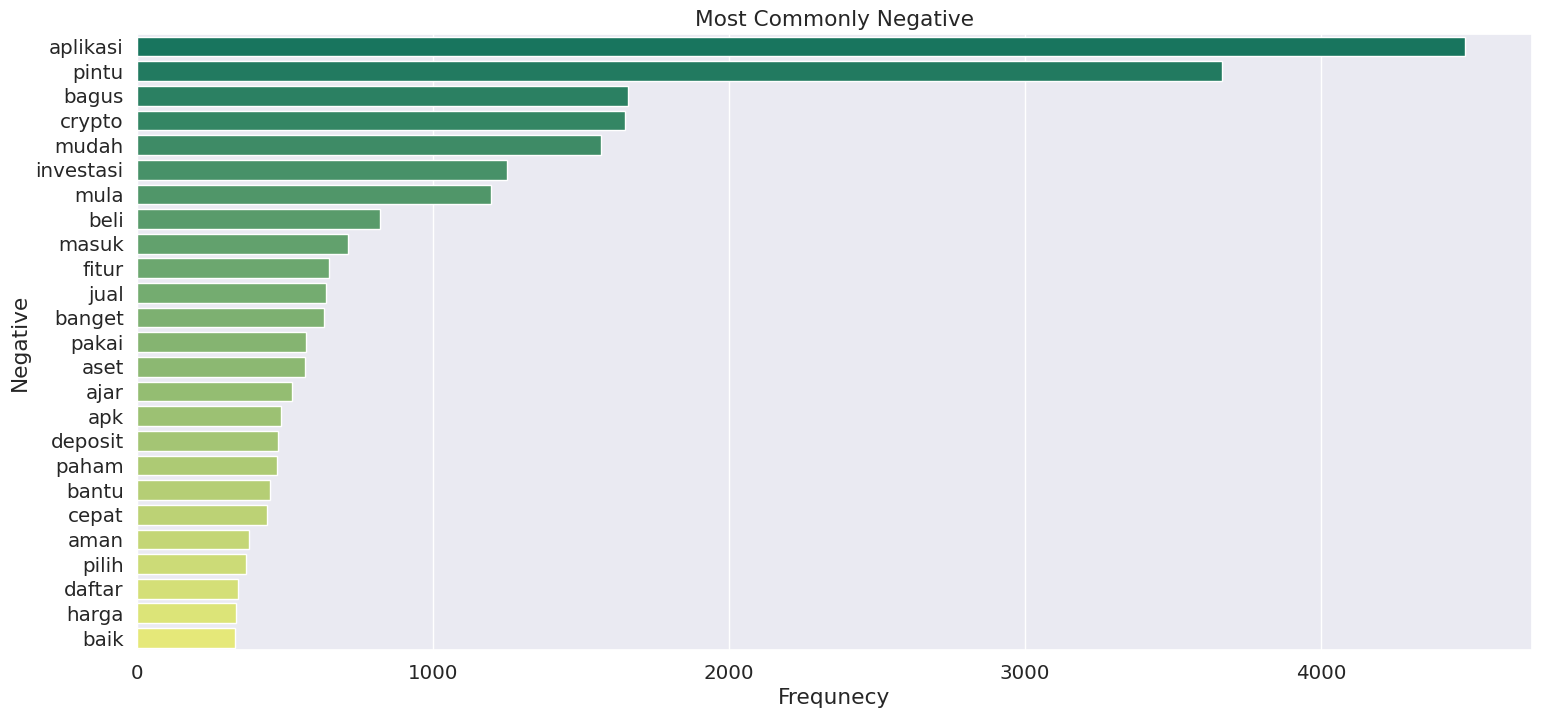

In [27]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words2 = []
for sentence in df_fix[df_fix['sentiment'] == -1]['text_akhir'].to_list():
    for word in sentence.split():
        all_words2.append(word)

df2 = pd.DataFrame(Counter(all_words2).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df2['Word'], x= df2['Frequency'], palette= 'summer')
plt.title("Most Commonly Negative")
plt.xlabel("Frequnecy")
plt.ylabel("Negative")
plt.show()

Penjelasan:

Dari worldcloud diperoleh bahwa kata `aplikasi, pintu, bagus, crypto, mudah, investasi, mula, beli, masuk, fitur, jual, banget, pakai, aset, ajar, apk, deposit, paham, bantu, cepat, aman, pilih, daftar, harga, dan baik` merupakan kata yang banyak digunakan dalam ulasan berlabel sentimen negatif.

### B.4.3 Wordcloud and distribusi word Neutral

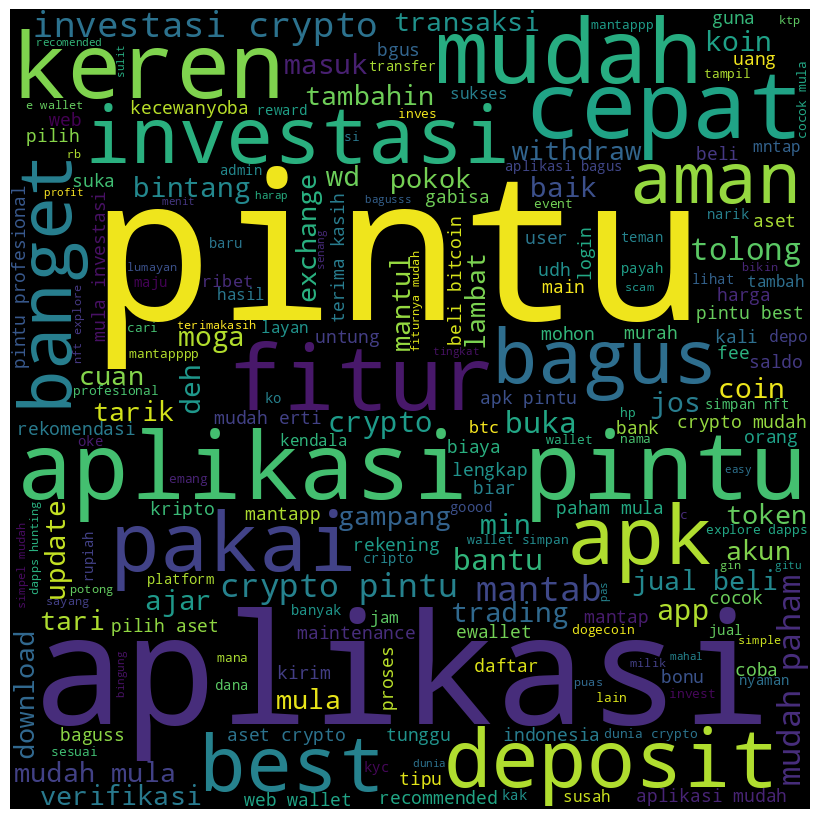

In [28]:
text5 = " ".join(df_fix[df_fix['polarity'] == 'neutral']['text_akhir'])
# Membuat Worldcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(text5)
# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Text(0, 0.5, 'Neutral')

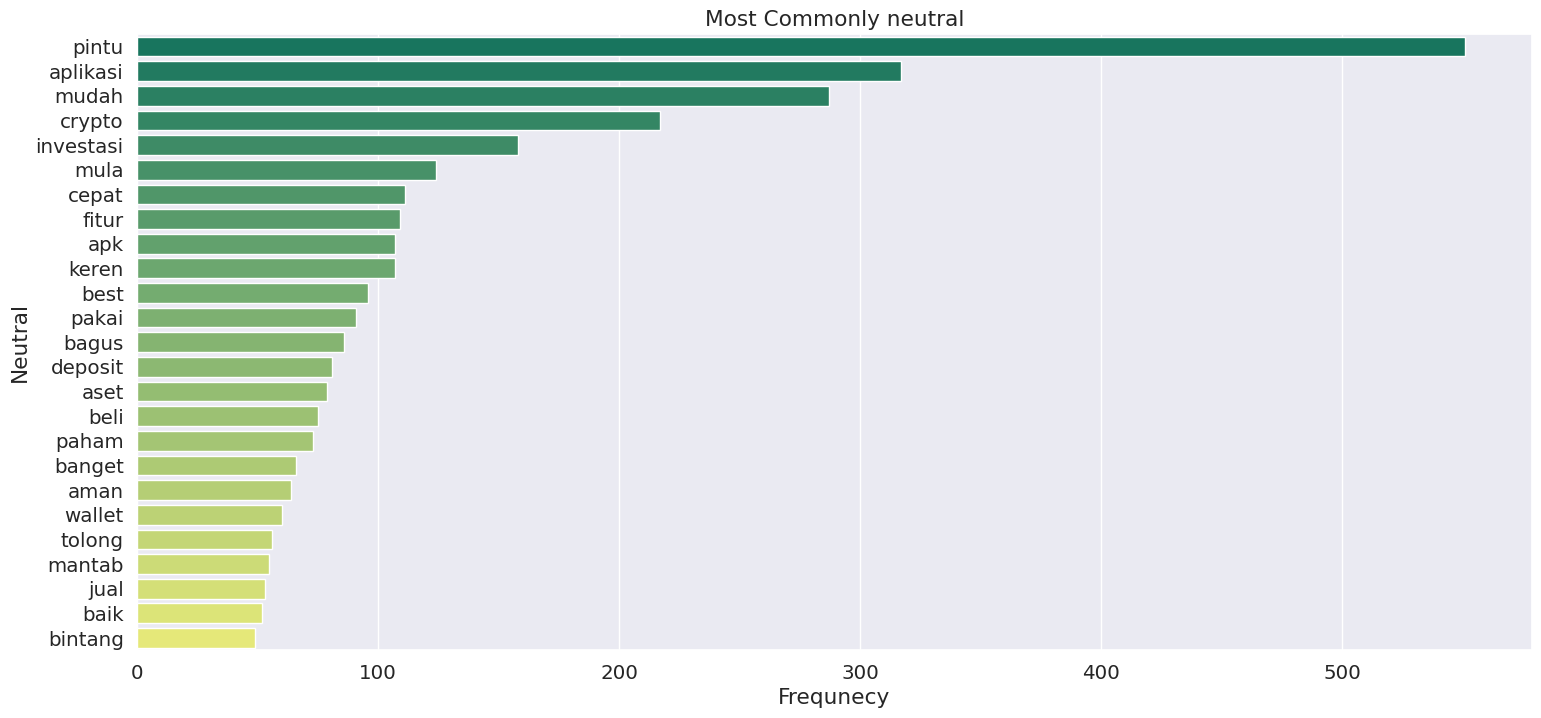

In [29]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words3 = []
for sentence in df_fix[df_fix['sentiment'] == 0]['text_akhir'].to_list():
    for word in sentence.split():
        all_words3.append(word)

df3 = pd.DataFrame(Counter(all_words3).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df3['Word'], x= df3['Frequency'], palette= 'summer')
plt.title("Most Commonly neutral")
plt.xlabel("Frequnecy")
plt.ylabel("Neutral")

Penjelasan:  

Dari worlcloud diperoleh bahwa kata `pintu, aplikasi, mudah, crypto, investasi, mula, cepat, fitur, apk, keren, best, pakai, bagus, deposit, aset, beli, paham, banget, aman, wallet, tolong, mantab, jual, baik, dan bintang` merupakan kata yang banyak digunakan dalam ulasan berlabel sentimen netral.

### B.4.4 Wordcloud and distribusi word positive, neutral, and negative

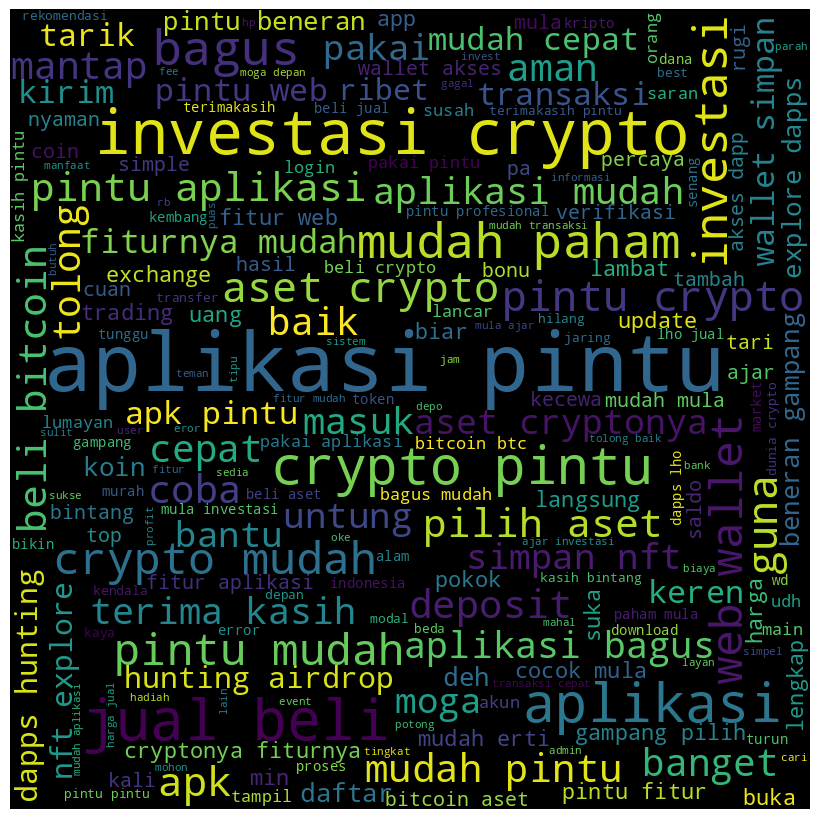

In [30]:
out = ' '.join([word for word in df_fix['text_akhir']])
# membuat worldcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(out)
# menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

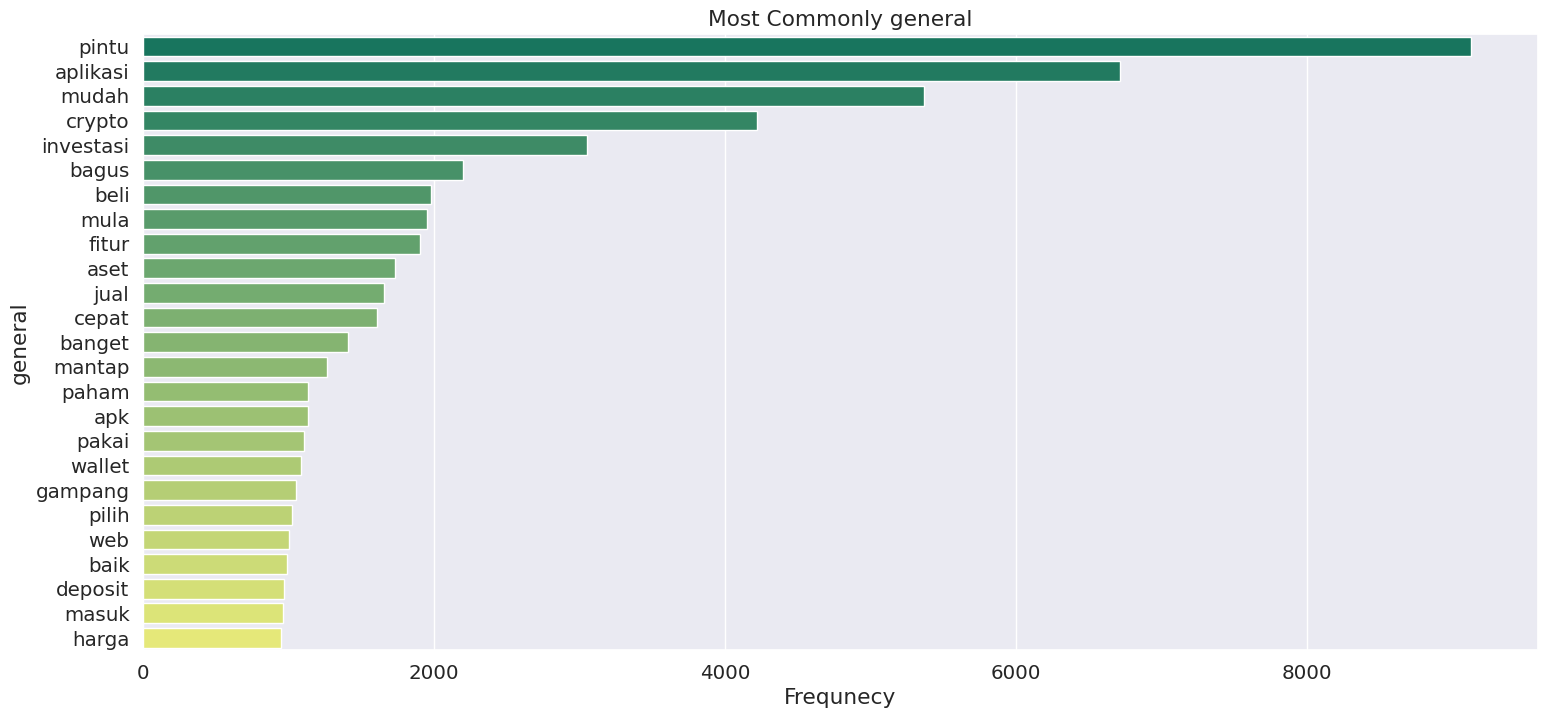

In [31]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words4 = []
for sentence in df_fix['text_akhir'].to_list():
    for word in sentence.split():
        all_words4.append(word)

df4 = pd.DataFrame(Counter(all_words4).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df4['Word'], x= df4['Frequency'], palette= 'summer')
plt.title("Most Commonly general")
plt.xlabel("Frequnecy")
plt.ylabel("general")
plt.show()

Penjelasan:  

Dari wordcloud diperoleh bahwa kata `pintu, aplikasi, mudah, crypto, investasi, beli, aset, jual, fitur, cepat, wallet, mantap, transaksi, baik, dan pilih`merupakan kata yang banyak digunakan dalam ulasan.  

# C. Pemodelan

In [32]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix,precision_recall_curve, auc, roc_curve, classification_report

In [34]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

In [35]:
#untuk hyperparameter tuning
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.4 MB/s eta 0:00:00


## C.1 Ekstrasi Fitur Tfidf dan Handling Imbalanced data

In [36]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df_fix['text_akhir']
y = df_fix['sentiment']
##y_rat = clean_df['sentiment_rating']

# Ekstraksi fitur dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df.head()

admin  airdrop      ajar  akses  akun  alam      aman  apk  aplikasi  app  \
0    0.0      0.0  0.000000    0.0   0.0   0.0  0.000000  0.0  0.156304  0.0   
1    0.0      0.0  0.000000    0.0   0.0   0.0  0.000000  0.0  0.124433  0.0   
2    0.0      0.0  0.216139    0.0   0.0   0.0  0.206199  0.0  0.117427  0.0   
3    0.0      0.0  0.000000    0.0   0.0   0.0  0.000000  0.0  0.118535  0.0   
4    0.0      0.0  0.000000    0.0   0.0   0.0  0.176567  0.0  0.301657  0.0   

   ...      uang  udh  untung  update  user  verifikasi    wallet   wd  \
0  ...  0.000000  0.0     0.0     0.0   0.0    0.338460  0.000000  0.0   
1  ...  0.000000  0.0     0.0     0.0   0.0    0.000000  0.210027  0.0   
2  ...  0.000000  0.0     0.0     0.0   0.0    0.000000  0.000000  0.0   
3  ...  0.000000  0.0     0.0     0.0   0.0    0.256675  0.000000  0.0   
4  ...  0.602716  0.0     0.0     0.0   0.0    0.000000  0.000000  0.0   

        web  withdraw  
0  0.000000  0.000000  
1  0.213234  0.000000  
2  0.000000  0.000000  
3  0.000000  0.275919  
4  0.000000  0.000000  

[5 rows x 200 columns]

In [37]:
# Handling imbalanced using SMOTE
from imblearn.over_sampling import SMOTE # Handling Imbalanced
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_tfidf,y)

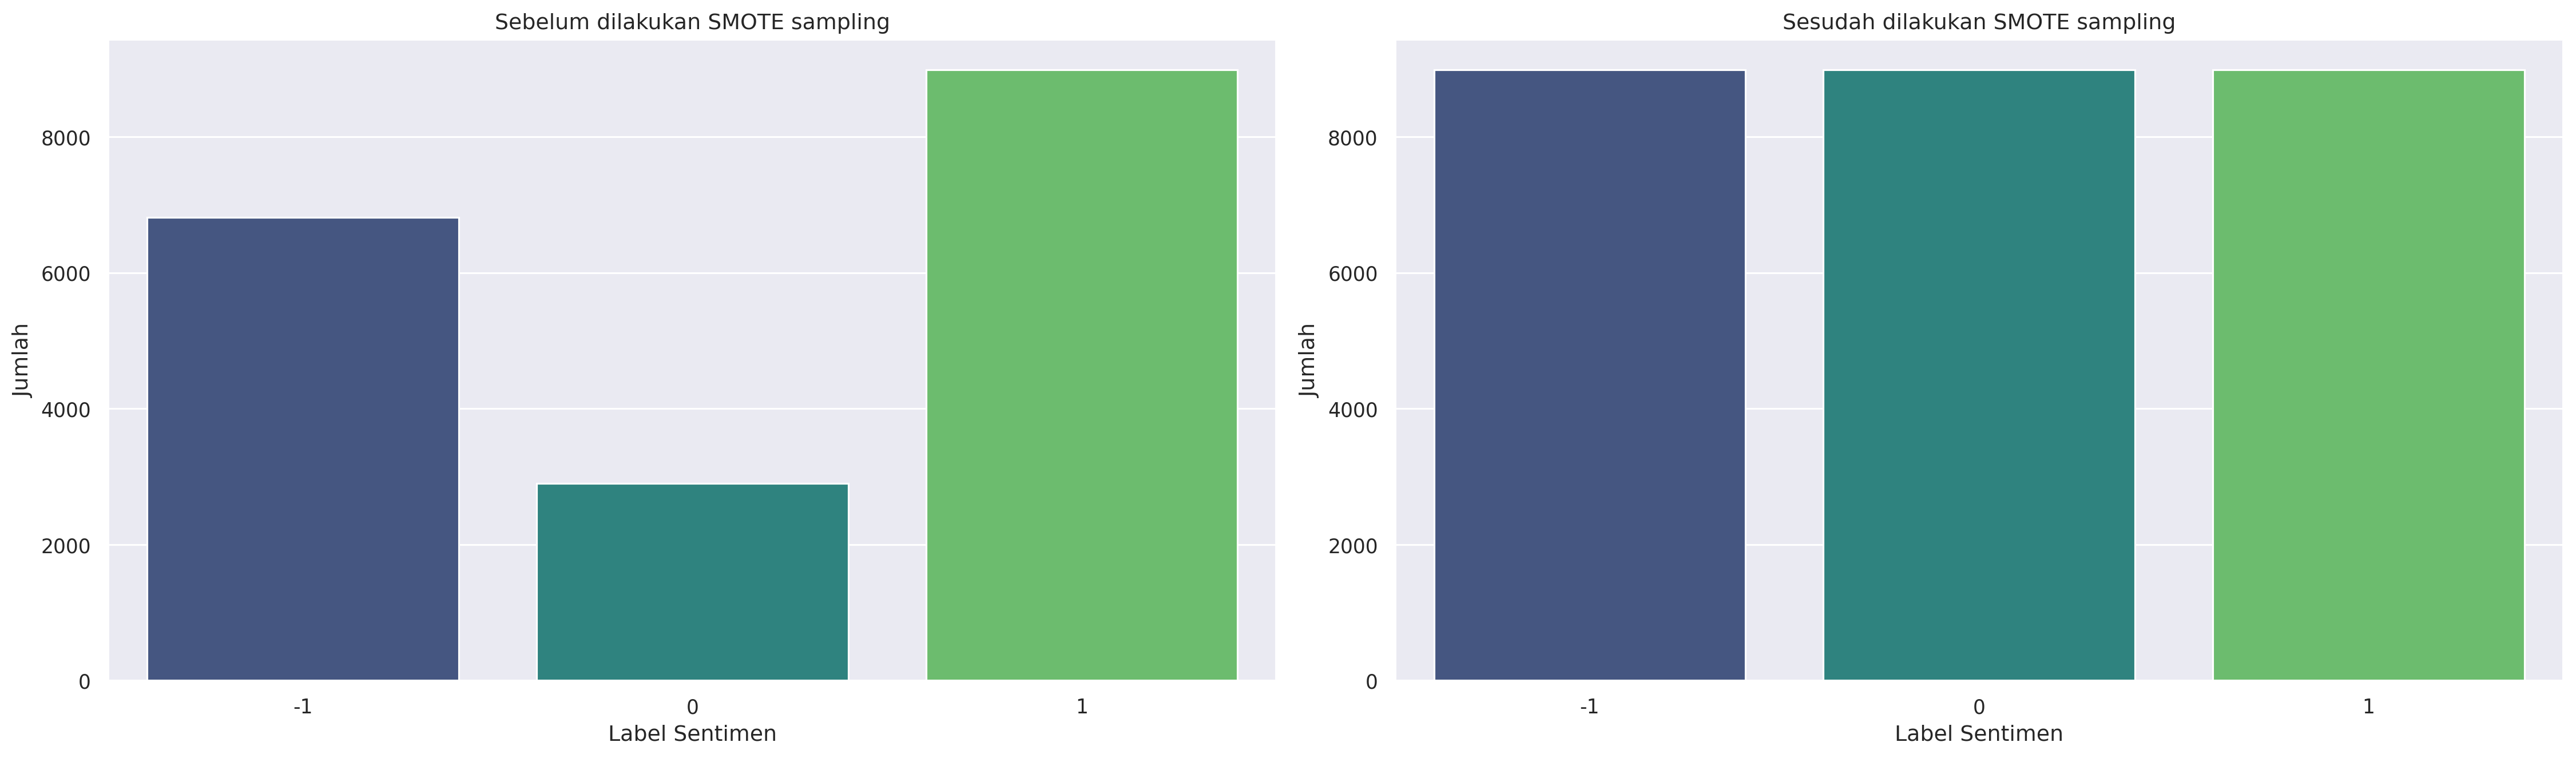

In [38]:
# Visualisasi
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

sns.set()

# Hitung distribusi sebelum dan sesudah
before_counts = df_fix['sentiment'].value_counts().sort_index()
after_counts = pd.Series(Counter(y_sm)).sort_index()

plt.figure(figsize=(20, 6), dpi=227)

# Visualisasi sebelum SMOTE
plt.subplot(1, 2, 1)
plt.title("Sebelum dilakukan SMOTE sampling")
sns.barplot(x=before_counts.index, y=before_counts.values, palette='viridis')
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah")

# Visualisasi sesudah SMOTE
plt.subplot(1, 2, 2)
plt.title("Sesudah dilakukan SMOTE sampling")
sns.barplot(x=after_counts.index, y=after_counts.values, palette='viridis')
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

Penjelasan:

Data awal menunjukkan ketidakseimbangan antara jumlah ulasan negatif (-1), netral (0), dan positif (1).

Ulasan negatif lebih banyak daripada ulasan netral dan positif.  Kondisi ini dapat menyebabkan model prediktif bias terhadap kelas mayoritas (negatif), yang membuat prediksi kurang akurat.

Untuk mengatasi masalah ini, teknik SMOTE (Teknik Pengambilan Sampel Minoritas Sintetis) mensintesis data baru untuk kelas minoritas (netral dan positif) agar jumlahnya seimbang dengan kelas mayoritas (negatif).  

Model prediktif memiliki peluang yang lebih besar untuk memahami karakteristik masing-masing kelas, yang mengarah pada prediksi yang lebih akurat dan adil, karena data didistribusikan secara lebih seimbang seperti yang ditunjukkan pada grafik setelah proses SMOTE.

Grafik kedua menunjukkan hasil implementasi SMOTE, di mana jumlah ulasan untuk setiap sentimen sama.  Hal ini sangat penting untuk meningkatkan kinerja model dan mencegah dominasi kelas tertentu.


## C.2 algoritma 1

### C.2.1 algoritma 1 dengan train 80%

In [39]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    x_sm,y_sm, test_size = 0.2, random_state = 1)

In [40]:
from sklearn.svm import SVC
svc = SVC(C= 3.811381411635508,kernel='rbf')
svc.fit(X_train.toarray(), Y_train)

Y_pred_svc = svc.predict(X_test.toarray())
Y_pred_tr_svc = svc.predict(X_train.toarray())

In [41]:
#Train
accuracy_tr_svc = round(accuracy_score(Y_train, Y_pred_tr_svc)*100,1)
#Test
accuracy_svc = round(accuracy_score(Y_test, Y_pred_svc)*100,1)

In [42]:
print("Hasil akurasi SVM Train: ", round(accuracy_tr_svc,1)," %")
print("Hasil akurasi SVM Test: ", round(accuracy_svc,1),"%")

Hasil akurasi SVM Train:  96.3  %
Hasil akurasi SVM Test:  89.7 %


In [43]:
#Simpan Evaluasi
stem_model_eval_tts_train.loc['SVM Train 80%'] = [accuracy_tr_svc]
stem_model_eval_tts_test.loc['SVM Test 20%'] = [accuracy_svc]

### C.2.2 algoritma 1 dengan train 70%

In [44]:
#from sklearn.datasets import make_classification
X_train_30, X_test_30, Y_train_30, Y_test_30 = train_test_split(
    x_sm,y_sm, test_size = 0.3, random_state = 2)

In [45]:
from sklearn.svm import SVC
svc_30 = SVC(C=2.4307461020095835,kernel='rbf',gamma=2.236160418945324)
svc_30.fit(X_train_30.toarray(), Y_train_30)

Y_pred_svc_30 = svc_30.predict(X_test_30.toarray())
Y_pred_tr_svc_30 = svc_30.predict(X_train_30.toarray())

In [46]:
#Train
accuracy_tr_svc_30 = round(accuracy_score(Y_train_30, Y_pred_tr_svc_30)*100,1)
#Test
accuracy_svc_30 = round(accuracy_score(Y_test_30, Y_pred_svc_30)*100,1)

In [47]:
print("hasil akurasi SVM Train: ", accuracy_tr_svc_30,"%")
print("hasil akurasi SVM Test: ", accuracy_svc_30,"%")

hasil akurasi SVM Train:  96.4 %
hasil akurasi SVM Test:  89.5 %


In [48]:
#Simpan Evaluasi
stem_model_eval_tts_train.loc['SVM Train 70%'] = [accuracy_tr_svc_30]
stem_model_eval_tts_test.loc['SVM Test 30%'] = [accuracy_svc_30]

## C.3  algoritma 2

In [49]:
!pip install catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


### C.3.1 algoritma 2 dengan train 80%

In [50]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.27),
        'depth': trial.suggest_int('depth', 3, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Buat pengklasifikasi kucing dengan hiperparameter yang disarankan
    cat = CatBoostClassifier(**params)

    # Melatih pengklasifikasi dan mengevaluasi pada set validasi
    cat.fit(X_train.toarray(), Y_train)
    accuracy = cat.score(X_test.toarray(), Y_test)
    return accuracy

# Proses Pengoptimalan
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,timeout=600*12)

# Cetak hiperparameter yang optimal dan tepat
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2025-04-13 09:15:04,210] A new study created in memory with name: no-name-44fa3dfb-0820-4ad0-ba6e-0697182d2e1e


0:	learn: 1.0342163	total: 4.75s	remaining: 39m 1s
1:	learn: 0.9868637	total: 8.64s	remaining: 35m 26s
2:	learn: 0.9497101	total: 12s	remaining: 32m 47s
3:	learn: 0.9177335	total: 14.6s	remaining: 29m 48s
4:	learn: 0.8944643	total: 18.7s	remaining: 30m 24s
5:	learn: 0.8720008	total: 22.6s	remaining: 30m 41s
6:	learn: 0.8548884	total: 26.3s	remaining: 30m 29s
7:	learn: 0.8380972	total: 29.6s	remaining: 30m
8:	learn: 0.8245734	total: 34.9s	remaining: 31m 21s
9:	learn: 0.8123727	total: 38.2s	remaining: 30m 46s
10:	learn: 0.8012600	total: 41.2s	remaining: 30m 7s
11:	learn: 0.7901636	total: 43.8s	remaining: 29m 19s
12:	learn: 0.7807743	total: 45.9s	remaining: 28m 16s
13:	learn: 0.7706870	total: 48.5s	remaining: 27m 43s
14:	learn: 0.7618756	total: 50.7s	remaining: 27m
15:	learn: 0.7544302	total: 52.4s	remaining: 26m 4s
16:	learn: 0.7466137	total: 54s	remaining: 25m 14s
17:	learn: 0.7398607	total: 55.5s	remaining: 24m 28s
18:	learn: 0.7330338	total: 57.1s	remaining: 23m 48s
19:	learn: 0.72687

[I 2025-04-13 09:30:36,603] Trial 0 finished with value: 0.865837817776953 and parameters: {'iterations': 494, 'learning_rate': 0.12116398711737042, 'depth': 10, 'random_strength': 1}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0937229	total: 479ms	remaining: 1m 23s
1:	learn: 1.0886452	total: 719ms	remaining: 1m 2s
2:	learn: 1.0837890	total: 947ms	remaining: 54.3s
3:	learn: 1.0759400	total: 1.18s	remaining: 50.3s
4:	learn: 1.0707447	total: 1.42s	remaining: 48.1s
5:	learn: 1.0637505	total: 1.65s	remaining: 46.6s
6:	learn: 1.0596317	total: 1.91s	remaining: 45.8s
7:	learn: 1.0545840	total: 2.13s	remaining: 44.5s
8:	learn: 1.0494188	total: 2.36s	remaining: 43.5s
9:	learn: 1.0462751	total: 2.59s	remaining: 42.7s
10:	learn: 1.0405959	total: 2.83s	remaining: 42.3s
11:	learn: 1.0359206	total: 3.12s	remaining: 42.4s
12:	learn: 1.0306362	total: 3.49s	remaining: 43.5s
13:	learn: 1.0241558	total: 3.9s	remaining: 44.8s
14:	learn: 1.0207528	total: 4.3s	remaining: 45.9s
15:	learn: 1.0158412	total: 4.71s	remaining: 46.8s
16:	learn: 1.0084045	total: 5.11s	remaining: 47.5s
17:	learn: 1.0041292	total: 5.55s	remaining: 48.4s
18:	learn: 1.0005498	total: 5.92s	remaining: 48.6s
19:	learn: 0.9976293	total: 6.33s	remainin

[I 2025-04-13 09:31:25,735] Trial 1 finished with value: 0.7146038226015958 and parameters: {'iterations': 175, 'learning_rate': 0.029426805837114496, 'depth': 7, 'random_strength': 8}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0111294	total: 848ms	remaining: 2m 7s
1:	learn: 0.9389687	total: 1.68s	remaining: 2m 5s
2:	learn: 0.8931809	total: 2.51s	remaining: 2m 3s
3:	learn: 0.8639861	total: 3.37s	remaining: 2m 3s
4:	learn: 0.8355396	total: 4.2s	remaining: 2m 2s
5:	learn: 0.8118130	total: 5.03s	remaining: 2m 1s
6:	learn: 0.7935114	total: 5.88s	remaining: 2m 1s
7:	learn: 0.7806714	total: 6.71s	remaining: 1m 59s
8:	learn: 0.7659503	total: 7.54s	remaining: 1m 58s
9:	learn: 0.7566538	total: 8.37s	remaining: 1m 57s
10:	learn: 0.7453146	total: 9.21s	remaining: 1m 57s
11:	learn: 0.7337384	total: 10.1s	remaining: 1m 57s
12:	learn: 0.7226478	total: 11.6s	remaining: 2m 2s
13:	learn: 0.7126683	total: 13.1s	remaining: 2m 8s
14:	learn: 0.7048214	total: 14.4s	remaining: 2m 10s
15:	learn: 0.6979309	total: 15.3s	remaining: 2m 8s
16:	learn: 0.6915599	total: 16.1s	remaining: 2m 6s
17:	learn: 0.6837106	total: 16.9s	remaining: 2m 5s
18:	learn: 0.6768468	total: 17.8s	remaining: 2m 3s
19:	learn: 0.6701164	total: 18.6s	re

[I 2025-04-13 09:33:54,644] Trial 2 finished with value: 0.8506216366672852 and parameters: {'iterations': 151, 'learning_rate': 0.24317315078245405, 'depth': 9, 'random_strength': 2}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0637829	total: 179ms	remaining: 42.7s
1:	learn: 1.0400163	total: 305ms	remaining: 36.3s
2:	learn: 1.0173851	total: 441ms	remaining: 34.8s
3:	learn: 0.9682624	total: 573ms	remaining: 33.8s
4:	learn: 0.9514360	total: 704ms	remaining: 33.1s
5:	learn: 0.9390993	total: 832ms	remaining: 32.4s
6:	learn: 0.9232389	total: 981ms	remaining: 32.7s
7:	learn: 0.9139588	total: 1.11s	remaining: 32.1s
8:	learn: 0.9015234	total: 1.24s	remaining: 31.7s
9:	learn: 0.8936024	total: 1.36s	remaining: 31.4s
10:	learn: 0.8841919	total: 1.5s	remaining: 31.2s
11:	learn: 0.8721147	total: 1.64s	remaining: 31.1s
12:	learn: 0.8607678	total: 1.77s	remaining: 30.9s
13:	learn: 0.8496553	total: 1.9s	remaining: 30.6s
14:	learn: 0.8441913	total: 2.04s	remaining: 30.7s
15:	learn: 0.8376278	total: 2.17s	remaining: 30.4s
16:	learn: 0.8330184	total: 2.3s	remaining: 30.2s
17:	learn: 0.8194636	total: 2.43s	remaining: 30s
18:	learn: 0.8130685	total: 2.56s	remaining: 29.8s
19:	learn: 0.8028873	total: 2.69s	remaining: 2

[I 2025-04-13 09:34:32,288] Trial 3 finished with value: 0.8509927630358137 and parameters: {'iterations': 240, 'learning_rate': 0.24192395817232032, 'depth': 6, 'random_strength': 9}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0716950	total: 331ms	remaining: 3m 1s
1:	learn: 1.0340324	total: 579ms	remaining: 2m 38s
2:	learn: 1.0152008	total: 815ms	remaining: 2m 28s
3:	learn: 0.9824292	total: 1.06s	remaining: 2m 25s
4:	learn: 0.9680833	total: 1.31s	remaining: 2m 22s
5:	learn: 0.9467799	total: 1.53s	remaining: 2m 18s
6:	learn: 0.9331315	total: 1.76s	remaining: 2m 16s
7:	learn: 0.9203060	total: 1.98s	remaining: 2m 14s
8:	learn: 0.9084276	total: 2.11s	remaining: 2m 6s
9:	learn: 0.8916697	total: 2.27s	remaining: 2m 2s
10:	learn: 0.8774307	total: 2.39s	remaining: 1m 57s
11:	learn: 0.8670387	total: 2.53s	remaining: 1m 53s
12:	learn: 0.8564877	total: 2.66s	remaining: 1m 49s
13:	learn: 0.8483246	total: 2.79s	remaining: 1m 46s
14:	learn: 0.8434313	total: 2.92s	remaining: 1m 44s
15:	learn: 0.8371478	total: 3.06s	remaining: 1m 42s
16:	learn: 0.8310397	total: 3.18s	remaining: 1m 39s
17:	learn: 0.8228697	total: 3.33s	remaining: 1m 38s
18:	learn: 0.8164620	total: 3.46s	remaining: 1m 36s
19:	learn: 0.8083359	tota

[I 2025-04-13 09:35:58,196] Trial 4 finished with value: 0.8613843013546112 and parameters: {'iterations': 550, 'learning_rate': 0.17816507933177655, 'depth': 6, 'random_strength': 6}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0955257	total: 2.63s	remaining: 26m 10s
1:	learn: 1.0906636	total: 4.24s	remaining: 21m 5s
2:	learn: 1.0852069	total: 5.84s	remaining: 19m 20s
3:	learn: 1.0816965	total: 7.43s	remaining: 18m 25s
4:	learn: 1.0776740	total: 9.04s	remaining: 17m 54s
5:	learn: 1.0729955	total: 10.6s	remaining: 17m 29s
6:	learn: 1.0675308	total: 12.2s	remaining: 17m 12s
7:	learn: 1.0608945	total: 14.6s	remaining: 18m
8:	learn: 1.0569242	total: 17.2s	remaining: 18m 47s
9:	learn: 1.0519139	total: 18.8s	remaining: 18m 26s
10:	learn: 1.0470356	total: 20.4s	remaining: 18m 9s
11:	learn: 1.0429380	total: 22s	remaining: 17m 54s
12:	learn: 1.0378346	total: 23.6s	remaining: 17m 43s
13:	learn: 1.0331268	total: 25.2s	remaining: 17m 31s
14:	learn: 1.0290855	total: 26.8s	remaining: 17m 22s
15:	learn: 1.0245055	total: 29.1s	remaining: 17m 40s
16:	learn: 1.0205995	total: 31.8s	remaining: 18m 7s
17:	learn: 1.0162963	total: 33.4s	remaining: 17m 56s
18:	learn: 1.0115988	total: 35s	remaining: 17m 46s
19:	learn: 1.0

[I 2025-04-13 09:54:19,046] Trial 5 finished with value: 0.7945815550194841 and parameters: {'iterations': 599, 'learning_rate': 0.01747675516280427, 'depth': 10, 'random_strength': 6}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0796054	total: 200ms	remaining: 2m 4s
1:	learn: 1.0616572	total: 335ms	remaining: 1m 44s
2:	learn: 1.0439471	total: 476ms	remaining: 1m 38s
3:	learn: 1.0302401	total: 607ms	remaining: 1m 34s
4:	learn: 1.0168888	total: 740ms	remaining: 1m 31s
5:	learn: 1.0031963	total: 887ms	remaining: 1m 31s
6:	learn: 0.9909789	total: 1.02s	remaining: 1m 30s
7:	learn: 0.9806346	total: 1.16s	remaining: 1m 29s
8:	learn: 0.9724860	total: 1.29s	remaining: 1m 28s
9:	learn: 0.9640108	total: 1.42s	remaining: 1m 27s
10:	learn: 0.9550522	total: 1.56s	remaining: 1m 26s
11:	learn: 0.9458597	total: 1.69s	remaining: 1m 26s
12:	learn: 0.9382644	total: 1.82s	remaining: 1m 25s
13:	learn: 0.9311608	total: 1.97s	remaining: 1m 25s
14:	learn: 0.9255188	total: 2.11s	remaining: 1m 25s
15:	learn: 0.9182973	total: 2.24s	remaining: 1m 25s
16:	learn: 0.9124763	total: 2.37s	remaining: 1m 24s
17:	learn: 0.9051362	total: 2.51s	remaining: 1m 24s
18:	learn: 0.8991769	total: 2.64s	remaining: 1m 24s
19:	learn: 0.8945384	to

[I 2025-04-13 09:55:56,884] Trial 6 finished with value: 0.8309519391352755 and parameters: {'iterations': 624, 'learning_rate': 0.04783501251652467, 'depth': 6, 'random_strength': 2}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0389895	total: 357ms	remaining: 1m 4s
1:	learn: 0.9947197	total: 588ms	remaining: 53.2s
2:	learn: 0.9617100	total: 868ms	remaining: 52.1s
3:	learn: 0.9343392	total: 1.1s	remaining: 49.4s
4:	learn: 0.9136970	total: 1.34s	remaining: 47.6s
5:	learn: 0.8977898	total: 1.57s	remaining: 46.3s
6:	learn: 0.8825896	total: 1.8s	remaining: 45.4s
7:	learn: 0.8653903	total: 2.06s	remaining: 45.1s
8:	learn: 0.8529251	total: 2.29s	remaining: 44.2s
9:	learn: 0.8433699	total: 2.52s	remaining: 43.6s
10:	learn: 0.8338586	total: 2.75s	remaining: 43.1s
11:	learn: 0.8243341	total: 3s	remaining: 42.8s
12:	learn: 0.8158178	total: 3.23s	remaining: 42.3s
13:	learn: 0.8079375	total: 3.48s	remaining: 42s
14:	learn: 0.8008438	total: 3.71s	remaining: 41.5s
15:	learn: 0.7943500	total: 3.93s	remaining: 41s
16:	learn: 0.7861876	total: 4.17s	remaining: 40.8s
17:	learn: 0.7790039	total: 4.4s	remaining: 40.3s
18:	learn: 0.7736744	total: 4.62s	remaining: 39.9s
19:	learn: 0.7683935	total: 4.85s	remaining: 39.5s


[I 2025-04-13 09:56:47,165] Trial 7 finished with value: 0.826683985897198 and parameters: {'iterations': 183, 'learning_rate': 0.12307716434968556, 'depth': 7, 'random_strength': 1}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0889900	total: 40.4ms	remaining: 31.6s
1:	learn: 1.0778568	total: 78ms	remaining: 30.5s
2:	learn: 1.0737303	total: 115ms	remaining: 30s
3:	learn: 1.0683663	total: 152ms	remaining: 29.7s
4:	learn: 1.0606544	total: 192ms	remaining: 29.9s
5:	learn: 1.0542136	total: 230ms	remaining: 29.9s
6:	learn: 1.0450741	total: 275ms	remaining: 30.5s
7:	learn: 1.0391751	total: 317ms	remaining: 30.7s
8:	learn: 1.0368994	total: 354ms	remaining: 30.5s
9:	learn: 1.0299617	total: 393ms	remaining: 30.4s
10:	learn: 1.0249662	total: 451ms	remaining: 31.7s
11:	learn: 1.0213580	total: 513ms	remaining: 33s
12:	learn: 1.0184441	total: 571ms	remaining: 33.9s
13:	learn: 1.0161408	total: 627ms	remaining: 34.5s
14:	learn: 1.0084894	total: 699ms	remaining: 35.8s
15:	learn: 1.0013439	total: 767ms	remaining: 36.8s
16:	learn: 0.9999949	total: 842ms	remaining: 38s
17:	learn: 0.9972045	total: 924ms	remaining: 39.3s
18:	learn: 0.9902467	total: 994ms	remaining: 40s
19:	learn: 0.9851194	total: 1.08s	remaining: 41.1

[I 2025-04-13 09:57:25,818] Trial 8 finished with value: 0.8255706067916125 and parameters: {'iterations': 784, 'learning_rate': 0.06406515434151114, 'depth': 3, 'random_strength': 9}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0867182	total: 1.58s	remaining: 2m 49s
1:	learn: 1.0706165	total: 3.23s	remaining: 2m 51s
2:	learn: 1.0514629	total: 5.14s	remaining: 2m 59s
3:	learn: 1.0365379	total: 7.96s	remaining: 3m 26s
4:	learn: 1.0238714	total: 9.81s	remaining: 3m 22s
5:	learn: 1.0117329	total: 11.4s	remaining: 3m 14s
6:	learn: 0.9919492	total: 13s	remaining: 3m 7s
7:	learn: 0.9801959	total: 14.6s	remaining: 3m 2s
8:	learn: 0.9721888	total: 16.2s	remaining: 2m 57s
9:	learn: 0.9622040	total: 17.8s	remaining: 2m 54s
10:	learn: 0.9513712	total: 19.8s	remaining: 2m 54s
11:	learn: 0.9432622	total: 22.5s	remaining: 2m 59s
12:	learn: 0.9341907	total: 24.2s	remaining: 2m 57s
13:	learn: 0.9262343	total: 25.8s	remaining: 2m 53s
14:	learn: 0.9172847	total: 27.4s	remaining: 2m 50s
15:	learn: 0.9078418	total: 29.1s	remaining: 2m 47s
16:	learn: 0.9003689	total: 30.7s	remaining: 2m 44s
17:	learn: 0.8949605	total: 32.3s	remaining: 2m 41s
18:	learn: 0.8851459	total: 34.6s	remaining: 2m 41s
19:	learn: 0.8768989	total

[I 2025-04-13 10:00:46,872] Trial 9 finished with value: 0.7632213768788273 and parameters: {'iterations': 108, 'learning_rate': 0.06910289822572052, 'depth': 10, 'random_strength': 6}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0694646	total: 39.6ms	remaining: 14.9s
1:	learn: 1.0453190	total: 78ms	remaining: 14.7s
2:	learn: 1.0299834	total: 117ms	remaining: 14.6s
3:	learn: 1.0110110	total: 157ms	remaining: 14.7s
4:	learn: 1.0002095	total: 196ms	remaining: 14.6s
5:	learn: 0.9847930	total: 236ms	remaining: 14.7s
6:	learn: 0.9711729	total: 282ms	remaining: 14.9s
7:	learn: 0.9608672	total: 322ms	remaining: 14.9s
8:	learn: 0.9484100	total: 363ms	remaining: 14.9s
9:	learn: 0.9385709	total: 403ms	remaining: 14.8s
10:	learn: 0.9319524	total: 441ms	remaining: 14.7s
11:	learn: 0.9259640	total: 478ms	remaining: 14.6s
12:	learn: 0.9213901	total: 518ms	remaining: 14.6s
13:	learn: 0.9179513	total: 555ms	remaining: 14.4s
14:	learn: 0.9107098	total: 597ms	remaining: 14.4s
15:	learn: 0.9018161	total: 637ms	remaining: 14.4s
16:	learn: 0.8983852	total: 675ms	remaining: 14.3s
17:	learn: 0.8913333	total: 713ms	remaining: 14.3s
18:	learn: 0.8841231	total: 757ms	remaining: 14.3s
19:	learn: 0.8779377	total: 799ms	remaini

[I 2025-04-13 10:01:05,782] Trial 10 finished with value: 0.8277973650027834 and parameters: {'iterations': 378, 'learning_rate': 0.13998894359913683, 'depth': 3, 'random_strength': 4}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0612982	total: 111ms	remaining: 50.6s
1:	learn: 1.0347171	total: 190ms	remaining: 43.2s
2:	learn: 0.9980077	total: 276ms	remaining: 41.7s
3:	learn: 0.9783112	total: 365ms	remaining: 41.2s
4:	learn: 0.9545829	total: 442ms	remaining: 39.9s
5:	learn: 0.9382567	total: 521ms	remaining: 39.1s
6:	learn: 0.9199522	total: 613ms	remaining: 39.3s
7:	learn: 0.9099738	total: 689ms	remaining: 38.6s
8:	learn: 0.8906512	total: 772ms	remaining: 38.3s
9:	learn: 0.8842872	total: 857ms	remaining: 38.2s
10:	learn: 0.8755700	total: 956ms	remaining: 38.7s
11:	learn: 0.8669168	total: 1.03s	remaining: 38.3s
12:	learn: 0.8577303	total: 1.12s	remaining: 38.2s
13:	learn: 0.8488637	total: 1.2s	remaining: 37.8s
14:	learn: 0.8399483	total: 1.28s	remaining: 37.5s
15:	learn: 0.8319172	total: 1.36s	remaining: 37.5s
16:	learn: 0.8254915	total: 1.44s	remaining: 37.2s
17:	learn: 0.8161341	total: 1.52s	remaining: 37s
18:	learn: 0.8104253	total: 1.61s	remaining: 37s
19:	learn: 0.8059851	total: 1.69s	remaining: 3

[I 2025-04-13 10:01:50,579] Trial 11 finished with value: 0.8552607162738912 and parameters: {'iterations': 456, 'learning_rate': 0.17413798026975352, 'depth': 5, 'random_strength': 4}. Best is trial 0 with value: 0.865837817776953.


0:	learn: 1.0533586	total: 712ms	remaining: 11m 3s
1:	learn: 1.0164305	total: 1.56s	remaining: 12m 6s
2:	learn: 0.9840499	total: 2.42s	remaining: 12m 29s
3:	learn: 0.9379938	total: 3.3s	remaining: 12m 45s
4:	learn: 0.9208379	total: 4.15s	remaining: 12m 50s
5:	learn: 0.9017849	total: 4.7s	remaining: 12m 5s
6:	learn: 0.8843393	total: 5.14s	remaining: 11m 20s
7:	learn: 0.8643375	total: 5.61s	remaining: 10m 49s
8:	learn: 0.8547689	total: 6.08s	remaining: 10m 23s
9:	learn: 0.8388950	total: 6.54s	remaining: 10m 3s
10:	learn: 0.8320020	total: 7s	remaining: 9m 46s
11:	learn: 0.8235995	total: 7.48s	remaining: 9m 34s
12:	learn: 0.8171990	total: 7.94s	remaining: 9m 22s
13:	learn: 0.8029293	total: 8.43s	remaining: 9m 13s
14:	learn: 0.7927628	total: 8.93s	remaining: 9m 6s
15:	learn: 0.7841138	total: 9.38s	remaining: 8m 57s
16:	learn: 0.7763709	total: 9.89s	remaining: 8m 52s
17:	learn: 0.7671785	total: 10.4s	remaining: 8m 46s
18:	learn: 0.7605940	total: 10.8s	remaining: 8m 41s
19:	learn: 0.7543403	t

[I 2025-04-13 10:10:14,935] Trial 12 finished with value: 0.8740025978845797 and parameters: {'iterations': 933, 'learning_rate': 0.19416519873506602, 'depth': 8, 'random_strength': 4}. Best is trial 12 with value: 0.8740025978845797.


0:	learn: 1.0524459	total: 454ms	remaining: 7m 26s
1:	learn: 1.0149277	total: 1.01s	remaining: 8m 14s
2:	learn: 0.9820526	total: 1.87s	remaining: 10m 11s
3:	learn: 0.9355327	total: 2.66s	remaining: 10m 50s
4:	learn: 0.9182783	total: 3.54s	remaining: 11m 33s
5:	learn: 0.8992144	total: 4.36s	remaining: 11m 49s
6:	learn: 0.8815896	total: 5.13s	remaining: 11m 55s
7:	learn: 0.8615259	total: 5.58s	remaining: 11m 20s
8:	learn: 0.8518318	total: 6.05s	remaining: 10m 54s
9:	learn: 0.8359779	total: 6.5s	remaining: 10m 32s
10:	learn: 0.8290126	total: 6.95s	remaining: 10m 14s
11:	learn: 0.8205888	total: 7.42s	remaining: 10m
12:	learn: 0.8136320	total: 7.9s	remaining: 9m 49s
13:	learn: 0.7992976	total: 8.4s	remaining: 9m 41s
14:	learn: 0.7891396	total: 8.86s	remaining: 9m 31s
15:	learn: 0.7804556	total: 9.32s	remaining: 9m 23s
16:	learn: 0.7727523	total: 9.78s	remaining: 9m 15s
17:	learn: 0.7634646	total: 10.2s	remaining: 9m 9s
18:	learn: 0.7568682	total: 10.7s	remaining: 9m 3s
19:	learn: 0.7506426	

[I 2025-04-13 10:19:07,456] Trial 13 finished with value: 0.8741881610688439 and parameters: {'iterations': 983, 'learning_rate': 0.19858266608439623, 'depth': 8, 'random_strength': 4}. Best is trial 13 with value: 0.8741881610688439.


0:	learn: 1.0513010	total: 463ms	remaining: 7m 40s
1:	learn: 1.0130508	total: 978ms	remaining: 8m 6s
2:	learn: 0.9795631	total: 1.56s	remaining: 8m 38s
3:	learn: 0.9324803	total: 2.41s	remaining: 9m 58s
4:	learn: 0.9109993	total: 3.26s	remaining: 10m 45s
5:	learn: 0.8924916	total: 4.11s	remaining: 11m 17s
6:	learn: 0.8759039	total: 4.94s	remaining: 11m 38s
7:	learn: 0.8555825	total: 5.68s	remaining: 11m 41s
8:	learn: 0.8457953	total: 6.16s	remaining: 11m 15s
9:	learn: 0.8259947	total: 6.63s	remaining: 10m 53s
10:	learn: 0.8188876	total: 7.1s	remaining: 10m 35s
11:	learn: 0.8095359	total: 7.56s	remaining: 10m 19s
12:	learn: 0.8025336	total: 8.04s	remaining: 10m 8s
13:	learn: 0.7926527	total: 8.5s	remaining: 9m 56s
14:	learn: 0.7827370	total: 8.97s	remaining: 9m 46s
15:	learn: 0.7746159	total: 9.45s	remaining: 9m 38s
16:	learn: 0.7672104	total: 9.91s	remaining: 9m 30s
17:	learn: 0.7578474	total: 10.4s	remaining: 9m 24s
18:	learn: 0.7512976	total: 10.8s	remaining: 9m 17s
19:	learn: 0.7448

[I 2025-04-13 10:28:04,734] Trial 14 finished with value: 0.8756726665429578 and parameters: {'iterations': 996, 'learning_rate': 0.2041603825219472, 'depth': 8, 'random_strength': 4}. Best is trial 14 with value: 0.8756726665429578.


0:	learn: 1.0381402	total: 480ms	remaining: 7m 49s
1:	learn: 0.9847668	total: 934ms	remaining: 7m 36s
2:	learn: 0.9400366	total: 1.39s	remaining: 7m 31s
3:	learn: 0.9110562	total: 1.84s	remaining: 7m 29s
4:	learn: 0.8832625	total: 2.33s	remaining: 7m 35s
5:	learn: 0.8642235	total: 2.79s	remaining: 7m 32s
6:	learn: 0.8459036	total: 3.25s	remaining: 7m 31s
7:	learn: 0.8267998	total: 3.7s	remaining: 7m 29s
8:	learn: 0.8153352	total: 4.17s	remaining: 7m 29s
9:	learn: 0.8018660	total: 4.62s	remaining: 7m 27s
10:	learn: 0.7907272	total: 5.07s	remaining: 7m 26s
11:	learn: 0.7820335	total: 5.54s	remaining: 7m 27s
12:	learn: 0.7756748	total: 5.99s	remaining: 7m 25s
13:	learn: 0.7638349	total: 6.47s	remaining: 7m 26s
14:	learn: 0.7537862	total: 6.93s	remaining: 7m 25s
15:	learn: 0.7454299	total: 7.39s	remaining: 7m 25s
16:	learn: 0.7377942	total: 7.84s	remaining: 7m 24s
17:	learn: 0.7298320	total: 8.3s	remaining: 7m 23s
18:	learn: 0.7231839	total: 8.76s	remaining: 7m 22s
19:	learn: 0.7183992	tot

[I 2025-04-13 10:36:52,060] Trial 15 finished with value: 0.8762293560957506 and parameters: {'iterations': 980, 'learning_rate': 0.21756141446012653, 'depth': 8, 'random_strength': 3}. Best is trial 15 with value: 0.8762293560957506.


0:	learn: 1.0287448	total: 464ms	remaining: 6m 27s
1:	learn: 0.9690240	total: 921ms	remaining: 6m 23s
2:	learn: 0.9337339	total: 1.39s	remaining: 6m 25s
3:	learn: 0.9016370	total: 1.84s	remaining: 6m 22s
4:	learn: 0.8748358	total: 2.31s	remaining: 6m 23s
5:	learn: 0.8549113	total: 2.99s	remaining: 6m 52s
6:	learn: 0.8360611	total: 3.87s	remaining: 7m 37s
7:	learn: 0.8198722	total: 4.68s	remaining: 8m 3s
8:	learn: 0.8058069	total: 5.48s	remaining: 8m 23s
9:	learn: 0.7869083	total: 6.25s	remaining: 8m 35s
10:	learn: 0.7784175	total: 7s	remaining: 8m 44s
11:	learn: 0.7699118	total: 7.47s	remaining: 8m 32s
12:	learn: 0.7606859	total: 7.93s	remaining: 8m 21s
13:	learn: 0.7471633	total: 8.38s	remaining: 8m 11s
14:	learn: 0.7357947	total: 8.85s	remaining: 8m 3s
15:	learn: 0.7265300	total: 9.31s	remaining: 7m 56s
16:	learn: 0.7206445	total: 9.78s	remaining: 7m 50s
17:	learn: 0.7131071	total: 10.2s	remaining: 7m 44s
18:	learn: 0.7066747	total: 10.7s	remaining: 7m 39s
19:	learn: 0.7004981	total:

[I 2025-04-13 10:44:21,543] Trial 16 finished with value: 0.8758582297272222 and parameters: {'iterations': 835, 'learning_rate': 0.25741242948546245, 'depth': 8, 'random_strength': 3}. Best is trial 15 with value: 0.8762293560957506.


0:	learn: 1.0242047	total: 1.38s	remaining: 18m 51s
1:	learn: 0.9541786	total: 2.79s	remaining: 19m
2:	learn: 0.8977939	total: 4.28s	remaining: 19m 23s
3:	learn: 0.8663079	total: 5.24s	remaining: 17m 46s
4:	learn: 0.8329848	total: 6.08s	remaining: 16m 28s
5:	learn: 0.8116516	total: 6.92s	remaining: 15m 36s
6:	learn: 0.7938821	total: 7.75s	remaining: 14m 58s
7:	learn: 0.7818759	total: 8.58s	remaining: 14m 28s
8:	learn: 0.7661576	total: 9.43s	remaining: 14m 7s
9:	learn: 0.7584499	total: 10.3s	remaining: 13m 51s
10:	learn: 0.7473486	total: 11.1s	remaining: 13m 37s
11:	learn: 0.7379853	total: 12s	remaining: 13m 27s
12:	learn: 0.7247738	total: 12.9s	remaining: 13m 17s
13:	learn: 0.7158219	total: 13.7s	remaining: 13m 7s
14:	learn: 0.7088658	total: 14.6s	remaining: 13m
15:	learn: 0.7021419	total: 16.1s	remaining: 13m 24s
16:	learn: 0.6945953	total: 17.6s	remaining: 13m 47s
17:	learn: 0.6860837	total: 19s	remaining: 14m 2s
18:	learn: 0.6805742	total: 19.8s	remaining: 13m 53s
19:	learn: 0.67338

[I 2025-04-13 10:57:35,748] Trial 17 finished with value: 0.8732603451475227 and parameters: {'iterations': 818, 'learning_rate': 0.2699353109139631, 'depth': 9, 'random_strength': 3}. Best is trial 15 with value: 0.8762293560957506.


0:	learn: 1.0136609	total: 849ms	remaining: 10m 30s
1:	learn: 0.9427910	total: 1.69s	remaining: 10m 25s
2:	learn: 0.8974282	total: 2.6s	remaining: 10m 41s
3:	learn: 0.8682987	total: 4.04s	remaining: 12m 25s
4:	learn: 0.8394535	total: 5.58s	remaining: 13m 43s
5:	learn: 0.8150789	total: 6.92s	remaining: 14m 9s
6:	learn: 0.7970325	total: 7.75s	remaining: 13m 35s
7:	learn: 0.7807455	total: 8.62s	remaining: 13m 11s
8:	learn: 0.7652971	total: 9.47s	remaining: 12m 52s
9:	learn: 0.7561823	total: 10.3s	remaining: 12m 35s
10:	learn: 0.7448702	total: 11.1s	remaining: 12m 21s
11:	learn: 0.7343326	total: 12s	remaining: 12m 8s
12:	learn: 0.7231294	total: 12.8s	remaining: 11m 59s
13:	learn: 0.7134105	total: 13.7s	remaining: 11m 51s
14:	learn: 0.7053533	total: 14.5s	remaining: 11m 43s
15:	learn: 0.6979520	total: 15.3s	remaining: 11m 37s
16:	learn: 0.6904016	total: 16.2s	remaining: 11m 31s
17:	learn: 0.6838642	total: 17.2s	remaining: 11m 30s
18:	learn: 0.6761309	total: 18.6s	remaining: 11m 48s
19:	lear

[I 2025-04-13 11:09:36,271] Trial 18 finished with value: 0.8778994247541287 and parameters: {'iterations': 743, 'learning_rate': 0.23500588048036183, 'depth': 9, 'random_strength': 2}. Best is trial 18 with value: 0.8778994247541287.


0:	learn: 1.0165156	total: 830ms	remaining: 10m 11s
1:	learn: 0.9471533	total: 1.7s	remaining: 10m 26s
2:	learn: 0.9023164	total: 2.54s	remaining: 10m 20s
3:	learn: 0.8732925	total: 3.37s	remaining: 10m 17s
4:	learn: 0.8433549	total: 4.28s	remaining: 10m 27s
5:	learn: 0.8218719	total: 5.72s	remaining: 11m 36s
6:	learn: 0.8034363	total: 7.09s	remaining: 12m 19s
7:	learn: 0.7884567	total: 8.44s	remaining: 12m 49s
8:	learn: 0.7707876	total: 9.39s	remaining: 12m 39s
9:	learn: 0.7622958	total: 10.2s	remaining: 12m 23s
10:	learn: 0.7493688	total: 11.1s	remaining: 12m 11s
11:	learn: 0.7381621	total: 11.9s	remaining: 11m 59s
12:	learn: 0.7272675	total: 12.7s	remaining: 11m 48s
13:	learn: 0.7176654	total: 13.6s	remaining: 11m 40s
14:	learn: 0.7098838	total: 14.4s	remaining: 11m 32s
15:	learn: 0.7036549	total: 15.2s	remaining: 11m 25s
16:	learn: 0.6957448	total: 16.1s	remaining: 11m 20s
17:	learn: 0.6885785	total: 16.9s	remaining: 11m 14s
18:	learn: 0.6833638	total: 17.7s	remaining: 11m 9s
19:	l

[I 2025-04-13 11:21:29,531] Trial 19 finished with value: 0.8749304138059009 and parameters: {'iterations': 737, 'learning_rate': 0.22590517274647773, 'depth': 9, 'random_strength': 2}. Best is trial 18 with value: 0.8778994247541287.


Best Hyperparameters: {'iterations': 743, 'learning_rate': 0.23500588048036183, 'depth': 9, 'random_strength': 2}
Best Accuracy: 0.8778994247541287


In [51]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations= 868, learning_rate= 0.2236513459562878, depth= 10, random_strength= 8)
cat.fit(X_train.toarray(), Y_train)

Y_pred_cat = cat.predict(X_test.toarray())
Y_pred_tr_cat = cat.predict(X_train.toarray())

0:	learn: 1.0631728	total: 4.33s	remaining: 1h 2m 36s
1:	learn: 1.0373428	total: 7.25s	remaining: 52m 21s
2:	learn: 0.9946691	total: 10.4s	remaining: 49m 49s
3:	learn: 0.9679269	total: 13.4s	remaining: 48m 24s
4:	learn: 0.9396092	total: 18s	remaining: 51m 40s
5:	learn: 0.9212540	total: 21.1s	remaining: 50m 30s
6:	learn: 0.9008661	total: 24s	remaining: 49m 16s
7:	learn: 0.8879632	total: 27.5s	remaining: 49m 20s
8:	learn: 0.8813080	total: 32.8s	remaining: 52m 9s
9:	learn: 0.8582213	total: 36.3s	remaining: 51m 54s
10:	learn: 0.8440591	total: 39.6s	remaining: 51m 28s
11:	learn: 0.8313576	total: 43.1s	remaining: 51m 15s
12:	learn: 0.8143707	total: 47.5s	remaining: 52m 5s
13:	learn: 0.8069989	total: 49.3s	remaining: 50m 6s
14:	learn: 0.7932049	total: 50.9s	remaining: 48m 14s
15:	learn: 0.7850945	total: 52.5s	remaining: 46m 35s
16:	learn: 0.7782368	total: 54s	remaining: 45m 5s
17:	learn: 0.7697076	total: 55.6s	remaining: 43m 46s
18:	learn: 0.7638376	total: 57.3s	remaining: 42m 40s
19:	learn: 

In [52]:
#Train
accuracy_tr_cat= round(accuracy_score(Y_train, Y_pred_tr_cat)*100,1)
#Test
accuracy_cat = round(accuracy_score(Y_test, Y_pred_cat)*100,1)

In [53]:
print("Hasil akurasi Catboost Train: ", accuracy_tr_cat,"%")
print("Hasil akurasi Catboost Test: ", accuracy_cat,"%")

Hasil akurasi Catboost Train:  94.1 %
Hasil akurasi Catboost Test:  87.7 %


In [54]:
#Save Evaluation
stem_model_eval_tts_train.loc['Catboost Train 80%'] = [accuracy_tr_cat]
stem_model_eval_tts_test.loc['Catboost Test 20%'] = [accuracy_cat]

### C.3.2  algoritma 2 dengan train 70%

In [55]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.4),
        'depth': trial.suggest_int('depth', 2, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Create the cat classifier with the suggested hyperparameters
    cat = CatBoostClassifier(**params)

    # Train the classifier and evaluate on the validation set
    cat.fit(X_train_30, Y_train_30)
    accuracy = cat.score(X_test_30, Y_test_30)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,timeout=600*18)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2025-04-13 11:48:32,776] A new study created in memory with name: no-name-b74389e0-47fd-43da-85f7-864d53476171


0:	learn: 1.0257228	total: 201ms	remaining: 3m 17s
1:	learn: 0.9571947	total: 314ms	remaining: 2m 33s
2:	learn: 0.9228109	total: 402ms	remaining: 2m 11s
3:	learn: 0.9004708	total: 477ms	remaining: 1m 56s
4:	learn: 0.8671107	total: 552ms	remaining: 1m 47s
5:	learn: 0.8571274	total: 623ms	remaining: 1m 41s
6:	learn: 0.8424710	total: 697ms	remaining: 1m 37s
7:	learn: 0.8310439	total: 769ms	remaining: 1m 33s
8:	learn: 0.8233831	total: 839ms	remaining: 1m 30s
9:	learn: 0.8122314	total: 912ms	remaining: 1m 28s
10:	learn: 0.8033759	total: 983ms	remaining: 1m 26s
11:	learn: 0.7909906	total: 1.06s	remaining: 1m 25s
12:	learn: 0.7801465	total: 1.13s	remaining: 1m 24s
13:	learn: 0.7691854	total: 1.2s	remaining: 1m 23s
14:	learn: 0.7623716	total: 1.27s	remaining: 1m 21s
15:	learn: 0.7542167	total: 1.35s	remaining: 1m 21s
16:	learn: 0.7488723	total: 1.43s	remaining: 1m 20s
17:	learn: 0.7415600	total: 1.51s	remaining: 1m 20s
18:	learn: 0.7333532	total: 1.58s	remaining: 1m 20s
19:	learn: 0.7268018	to

[I 2025-04-13 11:49:54,637] Trial 0 finished with value: 0.8687368551280465 and parameters: {'iterations': 982, 'learning_rate': 0.3117546513138465, 'depth': 5, 'random_strength': 3}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0204339	total: 704ms	remaining: 4m 11s
1:	learn: 0.9562596	total: 1.54s	remaining: 4m 34s
2:	learn: 0.9105849	total: 2.33s	remaining: 4m 36s
3:	learn: 0.8960993	total: 3.13s	remaining: 4m 37s
4:	learn: 0.8762088	total: 3.86s	remaining: 4m 33s
5:	learn: 0.8652239	total: 4.51s	remaining: 4m 25s
6:	learn: 0.8455184	total: 4.93s	remaining: 4m 7s
7:	learn: 0.8292868	total: 5.36s	remaining: 3m 55s
8:	learn: 0.8168858	total: 5.82s	remaining: 3m 46s
9:	learn: 0.8012107	total: 6.25s	remaining: 3m 38s
10:	learn: 0.7875322	total: 6.68s	remaining: 3m 31s
11:	learn: 0.7723722	total: 7.11s	remaining: 3m 25s
12:	learn: 0.7644879	total: 7.56s	remaining: 3m 21s
13:	learn: 0.7539481	total: 8s	remaining: 3m 17s
14:	learn: 0.7455963	total: 8.42s	remaining: 3m 13s
15:	learn: 0.7361245	total: 8.86s	remaining: 3m 9s
16:	learn: 0.7288321	total: 9.27s	remaining: 3m 6s
17:	learn: 0.7249218	total: 9.71s	remaining: 3m 3s
18:	learn: 0.7157078	total: 10.1s	remaining: 3m 1s
19:	learn: 0.7106749	total: 10

[I 2025-04-13 11:52:52,664] Trial 1 finished with value: 0.8627984659161203 and parameters: {'iterations': 359, 'learning_rate': 0.27480733781719896, 'depth': 8, 'random_strength': 4}. Best is trial 0 with value: 0.8687368551280465.


358:	learn: 0.3289700	total: 2m 57s	remaining: 0us
0:	learn: 1.0927751	total: 61.7ms	remaining: 27.9s
1:	learn: 1.0890729	total: 122ms	remaining: 27.5s
2:	learn: 1.0780942	total: 177ms	remaining: 26.5s
3:	learn: 1.0723985	total: 229ms	remaining: 25.7s
4:	learn: 1.0636905	total: 278ms	remaining: 24.9s
5:	learn: 1.0570562	total: 328ms	remaining: 24.4s
6:	learn: 1.0550030	total: 376ms	remaining: 24s
7:	learn: 1.0518681	total: 422ms	remaining: 23.5s
8:	learn: 1.0462971	total: 470ms	remaining: 23.2s
9:	learn: 1.0429172	total: 518ms	remaining: 22.9s
10:	learn: 1.0399686	total: 567ms	remaining: 22.8s
11:	learn: 1.0367938	total: 614ms	remaining: 22.6s
12:	learn: 1.0316781	total: 660ms	remaining: 22.3s
13:	learn: 1.0282632	total: 709ms	remaining: 22.2s
14:	learn: 1.0232214	total: 761ms	remaining: 22.2s
15:	learn: 1.0177959	total: 812ms	remaining: 22.2s
16:	learn: 1.0149194	total: 860ms	remaining: 22s
17:	learn: 1.0126228	total: 909ms	remaining: 22s
18:	learn: 1.0100990	total: 956ms	remaining: 2

[I 2025-04-13 11:53:18,127] Trial 2 finished with value: 0.787702585673636 and parameters: {'iterations': 453, 'learning_rate': 0.03843532190946242, 'depth': 4, 'random_strength': 9}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0635495	total: 352ms	remaining: 3m 32s
1:	learn: 1.0299661	total: 559ms	remaining: 2m 48s
2:	learn: 1.0055086	total: 794ms	remaining: 2m 39s
3:	learn: 0.9758885	total: 1.02s	remaining: 2m 33s
4:	learn: 0.9644126	total: 1.24s	remaining: 2m 28s
5:	learn: 0.9519009	total: 1.48s	remaining: 2m 27s
6:	learn: 0.9380004	total: 1.64s	remaining: 2m 19s
7:	learn: 0.9298302	total: 1.76s	remaining: 2m 11s
8:	learn: 0.9126366	total: 1.9s	remaining: 2m 5s
9:	learn: 0.9013064	total: 2.02s	remaining: 1m 59s
10:	learn: 0.8912990	total: 2.13s	remaining: 1m 55s
11:	learn: 0.8843256	total: 2.26s	remaining: 1m 51s
12:	learn: 0.8761217	total: 2.37s	remaining: 1m 47s
13:	learn: 0.8692114	total: 2.49s	remaining: 1m 45s
14:	learn: 0.8648570	total: 2.61s	remaining: 1m 42s
15:	learn: 0.8569477	total: 2.73s	remaining: 1m 40s
16:	learn: 0.8493249	total: 2.85s	remaining: 1m 38s
17:	learn: 0.8415336	total: 2.99s	remaining: 1m 37s
18:	learn: 0.8343437	total: 3.11s	remaining: 1m 35s
19:	learn: 0.8310429	tot

[I 2025-04-13 11:54:41,495] Trial 3 finished with value: 0.8595818384263268 and parameters: {'iterations': 604, 'learning_rate': 0.15683949403201533, 'depth': 6, 'random_strength': 8}. Best is trial 0 with value: 0.8687368551280465.


603:	learn: 0.3701239	total: 1m 23s	remaining: 0us
0:	learn: 1.0535993	total: 35.4ms	remaining: 26.4s
1:	learn: 1.0102405	total: 73.9ms	remaining: 27.5s
2:	learn: 0.9787534	total: 110ms	remaining: 27.4s
3:	learn: 0.9392214	total: 147ms	remaining: 27.3s
4:	learn: 0.9176440	total: 193ms	remaining: 28.7s
5:	learn: 0.8983992	total: 260ms	remaining: 32s
6:	learn: 0.8855552	total: 321ms	remaining: 33.9s
7:	learn: 0.8713259	total: 381ms	remaining: 35.1s
8:	learn: 0.8616346	total: 436ms	remaining: 35.7s
9:	learn: 0.8523803	total: 503ms	remaining: 37s
10:	learn: 0.8421445	total: 560ms	remaining: 37.4s
11:	learn: 0.8334270	total: 621ms	remaining: 38s
12:	learn: 0.8250097	total: 684ms	remaining: 38.6s
13:	learn: 0.8157774	total: 757ms	remaining: 39.6s
14:	learn: 0.8109033	total: 830ms	remaining: 40.5s
15:	learn: 0.8046658	total: 881ms	remaining: 40.2s
16:	learn: 0.7963210	total: 939ms	remaining: 40.3s
17:	learn: 0.7890039	total: 1.01s	remaining: 40.8s
18:	learn: 0.7843829	total: 1.08s	remaining: 

[I 2025-04-13 11:55:12,734] Trial 4 finished with value: 0.8564889273784486 and parameters: {'iterations': 746, 'learning_rate': 0.29751655618961087, 'depth': 3, 'random_strength': 2}. Best is trial 0 with value: 0.8687368551280465.


744:	learn: 0.3741863	total: 30.8s	remaining: 41.4ms
745:	learn: 0.3741570	total: 30.9s	remaining: 0us
0:	learn: 1.0680423	total: 116ms	remaining: 1m 29s
1:	learn: 1.0369839	total: 207ms	remaining: 1m 20s
2:	learn: 0.9980220	total: 313ms	remaining: 1m 20s
3:	learn: 0.9800580	total: 405ms	remaining: 1m 17s
4:	learn: 0.9606073	total: 500ms	remaining: 1m 16s
5:	learn: 0.9408322	total: 590ms	remaining: 1m 15s
6:	learn: 0.9335643	total: 679ms	remaining: 1m 14s
7:	learn: 0.9261670	total: 758ms	remaining: 1m 12s
8:	learn: 0.9130765	total: 856ms	remaining: 1m 12s
9:	learn: 0.9001011	total: 947ms	remaining: 1m 12s
10:	learn: 0.8938723	total: 1.03s	remaining: 1m 11s
11:	learn: 0.8876921	total: 1.13s	remaining: 1m 12s
12:	learn: 0.8817309	total: 1.24s	remaining: 1m 12s
13:	learn: 0.8727369	total: 1.35s	remaining: 1m 13s
14:	learn: 0.8640247	total: 1.43s	remaining: 1m 12s
15:	learn: 0.8558152	total: 1.48s	remaining: 1m 10s
16:	learn: 0.8485404	total: 1.53s	remaining: 1m 8s
17:	learn: 0.8431065	tot

[I 2025-04-13 11:55:57,108] Trial 5 finished with value: 0.8582209575652604 and parameters: {'iterations': 774, 'learning_rate': 0.20403575135138677, 'depth': 4, 'random_strength': 5}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0659964	total: 108ms	remaining: 1m 34s
1:	learn: 1.0341557	total: 181ms	remaining: 1m 18s
2:	learn: 1.0042112	total: 254ms	remaining: 1m 13s
3:	learn: 0.9807513	total: 332ms	remaining: 1m 12s
4:	learn: 0.9513739	total: 403ms	remaining: 1m 9s
5:	learn: 0.9426539	total: 473ms	remaining: 1m 8s
6:	learn: 0.9265536	total: 553ms	remaining: 1m 8s
7:	learn: 0.9065228	total: 626ms	remaining: 1m 7s
8:	learn: 0.9016325	total: 699ms	remaining: 1m 7s
9:	learn: 0.8949869	total: 790ms	remaining: 1m 8s
10:	learn: 0.8880840	total: 867ms	remaining: 1m 7s
11:	learn: 0.8821452	total: 937ms	remaining: 1m 7s
12:	learn: 0.8751643	total: 1.01s	remaining: 1m 7s
13:	learn: 0.8685965	total: 1.08s	remaining: 1m 6s
14:	learn: 0.8615116	total: 1.16s	remaining: 1m 6s
15:	learn: 0.8538024	total: 1.23s	remaining: 1m 6s
16:	learn: 0.8462134	total: 1.3s	remaining: 1m 5s
17:	learn: 0.8415562	total: 1.37s	remaining: 1m 5s
18:	learn: 0.8324436	total: 1.45s	remaining: 1m 5s
19:	learn: 0.8243600	total: 1.52s	rema

[I 2025-04-13 11:57:11,908] Trial 6 finished with value: 0.8658913769639985 and parameters: {'iterations': 873, 'learning_rate': 0.23800495455188478, 'depth': 5, 'random_strength': 10}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0790272	total: 427ms	remaining: 4m 44s
1:	learn: 1.0561811	total: 842ms	remaining: 4m 39s
2:	learn: 1.0360166	total: 1.27s	remaining: 4m 41s
3:	learn: 1.0201914	total: 1.69s	remaining: 4m 39s
4:	learn: 1.0047303	total: 2.11s	remaining: 4m 39s
5:	learn: 0.9976435	total: 2.56s	remaining: 4m 41s
6:	learn: 0.9852445	total: 2.96s	remaining: 4m 39s
7:	learn: 0.9748721	total: 3.4s	remaining: 4m 39s
8:	learn: 0.9655113	total: 3.81s	remaining: 4m 37s
9:	learn: 0.9536679	total: 4.22s	remaining: 4m 36s
10:	learn: 0.9456723	total: 4.66s	remaining: 4m 37s
11:	learn: 0.9354053	total: 5.08s	remaining: 4m 36s
12:	learn: 0.9280051	total: 5.51s	remaining: 4m 36s
13:	learn: 0.9188794	total: 5.92s	remaining: 4m 35s
14:	learn: 0.9122163	total: 6.34s	remaining: 4m 35s
15:	learn: 0.9036102	total: 6.77s	remaining: 4m 35s
16:	learn: 0.8987876	total: 7.19s	remaining: 4m 34s
17:	learn: 0.8962952	total: 7.89s	remaining: 4m 44s
18:	learn: 0.8908050	total: 8.69s	remaining: 4m 56s
19:	learn: 0.8868712	to

[I 2025-04-13 12:02:38,432] Trial 7 finished with value: 0.8537671656563157 and parameters: {'iterations': 666, 'learning_rate': 0.07236157493003484, 'depth': 8, 'random_strength': 6}. Best is trial 0 with value: 0.8687368551280465.


665:	learn: 0.3961510	total: 5m 26s	remaining: 0us
0:	learn: 1.0962911	total: 647ms	remaining: 5m 17s
1:	learn: 1.0938478	total: 1.03s	remaining: 4m 11s
2:	learn: 1.0914230	total: 1.38s	remaining: 3m 44s
3:	learn: 1.0894210	total: 1.77s	remaining: 3m 36s
4:	learn: 1.0868488	total: 2.15s	remaining: 3m 29s
5:	learn: 1.0845891	total: 2.52s	remaining: 3m 24s
6:	learn: 1.0826638	total: 2.91s	remaining: 3m 21s
7:	learn: 1.0804934	total: 3.28s	remaining: 3m 18s
8:	learn: 1.0782623	total: 3.66s	remaining: 3m 16s
9:	learn: 1.0762698	total: 4.03s	remaining: 3m 14s
10:	learn: 1.0743611	total: 4.28s	remaining: 3m 7s
11:	learn: 1.0723172	total: 4.5s	remaining: 3m
12:	learn: 1.0702051	total: 4.74s	remaining: 2m 54s
13:	learn: 1.0681473	total: 4.96s	remaining: 2m 49s
14:	learn: 1.0665086	total: 5.17s	remaining: 2m 44s
15:	learn: 1.0643239	total: 5.38s	remaining: 2m 40s
16:	learn: 1.0622577	total: 5.6s	remaining: 2m 36s
17:	learn: 1.0601306	total: 5.85s	remaining: 2m 34s
18:	learn: 1.0581551	total: 6.

[I 2025-04-13 12:04:44,111] Trial 8 finished with value: 0.7046888531485834 and parameters: {'iterations': 492, 'learning_rate': 0.0054975095844620354, 'depth': 7, 'random_strength': 2}. Best is trial 0 with value: 0.8687368551280465.


491:	learn: 0.7801700	total: 2m 5s	remaining: 0us
0:	learn: 1.0156086	total: 1.5s	remaining: 3m 27s
1:	learn: 0.9508764	total: 3.01s	remaining: 3m 26s
2:	learn: 0.9112992	total: 4.52s	remaining: 3m 24s
3:	learn: 0.8738554	total: 6.04s	remaining: 3m 24s
4:	learn: 0.8586682	total: 8.51s	remaining: 3m 48s
5:	learn: 0.8407158	total: 10.9s	remaining: 4m 1s
6:	learn: 0.8216059	total: 12.4s	remaining: 3m 54s
7:	learn: 0.8039455	total: 13.9s	remaining: 3m 47s
8:	learn: 0.7846230	total: 15.4s	remaining: 3m 43s
9:	learn: 0.7681018	total: 16.9s	remaining: 3m 38s
10:	learn: 0.7610281	total: 18.5s	remaining: 3m 34s
11:	learn: 0.7458323	total: 20s	remaining: 3m 31s
12:	learn: 0.7360037	total: 22s	remaining: 3m 33s
13:	learn: 0.7258799	total: 24.5s	remaining: 3m 39s
14:	learn: 0.7171248	total: 26.4s	remaining: 3m 38s
15:	learn: 0.7088100	total: 27.9s	remaining: 3m 34s
16:	learn: 0.7020552	total: 29.4s	remaining: 3m 31s
17:	learn: 0.6957030	total: 30.9s	remaining: 3m 27s
18:	learn: 0.6905606	total: 32

[I 2025-04-13 12:08:42,480] Trial 9 finished with value: 0.8566126438203637 and parameters: {'iterations': 139, 'learning_rate': 0.3555200864579739, 'depth': 10, 'random_strength': 7}. Best is trial 0 with value: 0.8687368551280465.


138:	learn: 0.3642990	total: 3m 58s	remaining: 0us
0:	learn: 1.0344893	total: 27.2ms	remaining: 25.5s
1:	learn: 0.9916525	total: 55.2ms	remaining: 25.9s
2:	learn: 0.9608690	total: 86.8ms	remaining: 27.1s
3:	learn: 0.9332613	total: 112ms	remaining: 26.2s
4:	learn: 0.9136272	total: 139ms	remaining: 25.9s
5:	learn: 0.8979406	total: 166ms	remaining: 25.8s
6:	learn: 0.8874325	total: 192ms	remaining: 25.6s
7:	learn: 0.8776961	total: 218ms	remaining: 25.4s
8:	learn: 0.8669724	total: 245ms	remaining: 25.3s
9:	learn: 0.8584938	total: 277ms	remaining: 25.8s
10:	learn: 0.8509209	total: 303ms	remaining: 25.6s
11:	learn: 0.8424643	total: 330ms	remaining: 25.5s
12:	learn: 0.8347717	total: 355ms	remaining: 25.3s
13:	learn: 0.8278599	total: 381ms	remaining: 25.2s
14:	learn: 0.8214075	total: 406ms	remaining: 25s
15:	learn: 0.8139468	total: 431ms	remaining: 24.9s
16:	learn: 0.8074048	total: 456ms	remaining: 24.7s
17:	learn: 0.8001703	total: 486ms	remaining: 24.9s
18:	learn: 0.7939381	total: 523ms	remain

[I 2025-04-13 12:09:11,666] Trial 10 finished with value: 0.8536434492144006 and parameters: {'iterations': 940, 'learning_rate': 0.3763809726820851, 'depth': 2, 'random_strength': 1}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0661877	total: 118ms	remaining: 1m 57s
1:	learn: 1.0344957	total: 237ms	remaining: 1m 58s
2:	learn: 1.0046448	total: 374ms	remaining: 2m 4s
3:	learn: 0.9813075	total: 502ms	remaining: 2m 4s
4:	learn: 0.9520970	total: 650ms	remaining: 2m 9s
5:	learn: 0.9434037	total: 784ms	remaining: 2m 9s
6:	learn: 0.9273032	total: 926ms	remaining: 2m 11s
7:	learn: 0.9072932	total: 1.07s	remaining: 2m 12s
8:	learn: 0.9024277	total: 1.19s	remaining: 2m 10s
9:	learn: 0.8957845	total: 1.32s	remaining: 2m 10s
10:	learn: 0.8889035	total: 1.45s	remaining: 2m 10s
11:	learn: 0.8829933	total: 1.58s	remaining: 2m 9s
12:	learn: 0.8760292	total: 1.74s	remaining: 2m 11s
13:	learn: 0.8694906	total: 1.87s	remaining: 2m 11s
14:	learn: 0.8624034	total: 2.01s	remaining: 2m 11s
15:	learn: 0.8547183	total: 2.14s	remaining: 2m 11s
16:	learn: 0.8471438	total: 2.29s	remaining: 2m 12s
17:	learn: 0.8424964	total: 2.42s	remaining: 2m 12s
18:	learn: 0.8333794	total: 2.58s	remaining: 2m 13s
19:	learn: 0.8253313	total:

[I 2025-04-13 12:10:56,745] Trial 11 finished with value: 0.868241989360386 and parameters: {'iterations': 999, 'learning_rate': 0.23638290634303216, 'depth': 5, 'random_strength': 10}. Best is trial 0 with value: 0.8687368551280465.


998:	learn: 0.3182613	total: 1m 44s	remaining: 0us
0:	learn: 1.0617587	total: 306ms	remaining: 5m 3s
1:	learn: 1.0186645	total: 539ms	remaining: 4m 26s
2:	learn: 0.9921436	total: 761ms	remaining: 4m 11s
3:	learn: 0.9595123	total: 990ms	remaining: 4m 4s
4:	learn: 0.9499729	total: 1.21s	remaining: 3m 59s
5:	learn: 0.9335317	total: 1.44s	remaining: 3m 57s
6:	learn: 0.9171758	total: 1.56s	remaining: 3m 40s
7:	learn: 0.9105300	total: 1.71s	remaining: 3m 30s
8:	learn: 0.8960325	total: 1.83s	remaining: 3m 19s
9:	learn: 0.8878921	total: 1.95s	remaining: 3m 11s
10:	learn: 0.8788260	total: 2.07s	remaining: 3m 4s
11:	learn: 0.8705445	total: 2.2s	remaining: 2m 59s
12:	learn: 0.8604275	total: 2.32s	remaining: 2m 54s
13:	learn: 0.8532468	total: 2.44s	remaining: 2m 50s
14:	learn: 0.8445560	total: 2.56s	remaining: 2m 47s
15:	learn: 0.8371224	total: 2.7s	remaining: 2m 45s
16:	learn: 0.8314125	total: 2.82s	remaining: 2m 41s
17:	learn: 0.8240785	total: 2.95s	remaining: 2m 39s
18:	learn: 0.8180480	total: 

[I 2025-04-13 12:13:18,811] Trial 12 finished with value: 0.8662625262897439 and parameters: {'iterations': 993, 'learning_rate': 0.14158258675017033, 'depth': 6, 'random_strength': 4}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0283826	total: 106ms	remaining: 1m 27s
1:	learn: 0.9614115	total: 192ms	remaining: 1m 19s
2:	learn: 0.9276173	total: 263ms	remaining: 1m 12s
3:	learn: 0.9058088	total: 350ms	remaining: 1m 12s
4:	learn: 0.8723097	total: 422ms	remaining: 1m 9s
5:	learn: 0.8625237	total: 493ms	remaining: 1m 7s
6:	learn: 0.8479960	total: 571ms	remaining: 1m 7s
7:	learn: 0.8366690	total: 644ms	remaining: 1m 6s
8:	learn: 0.8292483	total: 714ms	remaining: 1m 5s
9:	learn: 0.8186420	total: 794ms	remaining: 1m 5s
10:	learn: 0.8072366	total: 866ms	remaining: 1m 4s
11:	learn: 0.7951112	total: 939ms	remaining: 1m 3s
12:	learn: 0.7843857	total: 1.02s	remaining: 1m 3s
13:	learn: 0.7736298	total: 1.09s	remaining: 1m 3s
14:	learn: 0.7662562	total: 1.19s	remaining: 1m 4s
15:	learn: 0.7560934	total: 1.32s	remaining: 1m 6s
16:	learn: 0.7495887	total: 1.43s	remaining: 1m 8s
17:	learn: 0.7418774	total: 1.57s	remaining: 1m 10s
18:	learn: 0.7342988	total: 1.7s	remaining: 1m 12s
19:	learn: 0.7270861	total: 1.85s	re

[I 2025-04-13 12:14:30,612] Trial 13 finished with value: 0.867252257825065 and parameters: {'iterations': 829, 'learning_rate': 0.2978365763145383, 'depth': 5, 'random_strength': 3}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0564541	total: 64ms	remaining: 1m 3s
1:	learn: 1.0343451	total: 113ms	remaining: 56.2s
2:	learn: 0.9974731	total: 164ms	remaining: 54.3s
3:	learn: 0.9843802	total: 218ms	remaining: 54.3s
4:	learn: 0.9613535	total: 271ms	remaining: 53.9s
5:	learn: 0.9423514	total: 322ms	remaining: 53.4s
6:	learn: 0.9375062	total: 368ms	remaining: 52.2s
7:	learn: 0.9214963	total: 415ms	remaining: 51.4s
8:	learn: 0.9069384	total: 462ms	remaining: 50.8s
9:	learn: 0.8953932	total: 519ms	remaining: 51.4s
10:	learn: 0.8808602	total: 582ms	remaining: 52.3s
11:	learn: 0.8739543	total: 628ms	remaining: 51.6s
12:	learn: 0.8682754	total: 674ms	remaining: 51.1s
13:	learn: 0.8621056	total: 723ms	remaining: 50.9s
14:	learn: 0.8567602	total: 777ms	remaining: 51s
15:	learn: 0.8436457	total: 826ms	remaining: 50.7s
16:	learn: 0.8331755	total: 873ms	remaining: 50.4s
17:	learn: 0.8272745	total: 922ms	remaining: 50.3s
18:	learn: 0.8241280	total: 975ms	remaining: 50.3s
19:	learn: 0.8187694	total: 1.02s	remaining:

[I 2025-04-13 12:15:27,963] Trial 14 finished with value: 0.865396511196338 and parameters: {'iterations': 999, 'learning_rate': 0.3271312799189042, 'depth': 4, 'random_strength': 10}. Best is trial 0 with value: 0.8687368551280465.


998:	learn: 0.3206328	total: 57s	remaining: 0us
0:	learn: 1.0560389	total: 33.3ms	remaining: 29.6s
1:	learn: 1.0198150	total: 59.9ms	remaining: 26.6s
2:	learn: 0.9938471	total: 85.9ms	remaining: 25.4s
3:	learn: 0.9750934	total: 113ms	remaining: 25.1s
4:	learn: 0.9566097	total: 140ms	remaining: 24.8s
5:	learn: 0.9350191	total: 170ms	remaining: 25s
6:	learn: 0.9209778	total: 197ms	remaining: 24.8s
7:	learn: 0.9163107	total: 223ms	remaining: 24.6s
8:	learn: 0.9051060	total: 256ms	remaining: 25s
9:	learn: 0.8991477	total: 281ms	remaining: 24.7s
10:	learn: 0.8913227	total: 306ms	remaining: 24.5s
11:	learn: 0.8803465	total: 332ms	remaining: 24.3s
12:	learn: 0.8733809	total: 357ms	remaining: 24.1s
13:	learn: 0.8609661	total: 384ms	remaining: 24s
14:	learn: 0.8483229	total: 409ms	remaining: 23.8s
15:	learn: 0.8398603	total: 435ms	remaining: 23.7s
16:	learn: 0.8317870	total: 468ms	remaining: 24s
17:	learn: 0.8268595	total: 494ms	remaining: 23.9s
18:	learn: 0.8157851	total: 522ms	remaining: 23.9

[I 2025-04-13 12:15:56,099] Trial 15 finished with value: 0.8538908820982308 and parameters: {'iterations': 889, 'learning_rate': 0.3964630305228886, 'depth': 2, 'random_strength': 6}. Best is trial 0 with value: 0.8687368551280465.


0:	learn: 1.0471195	total: 301ms	remaining: 3m 28s
1:	learn: 1.0170832	total: 515ms	remaining: 2m 58s
2:	learn: 0.9771921	total: 733ms	remaining: 2m 48s
3:	learn: 0.9411871	total: 964ms	remaining: 2m 46s
4:	learn: 0.9262729	total: 1.18s	remaining: 2m 42s
5:	learn: 0.9108422	total: 1.4s	remaining: 2m 40s
6:	learn: 0.9045311	total: 1.63s	remaining: 2m 39s
7:	learn: 0.8848342	total: 1.95s	remaining: 2m 47s
8:	learn: 0.8756574	total: 2.35s	remaining: 2m 58s
9:	learn: 0.8598006	total: 2.73s	remaining: 3m 6s
10:	learn: 0.8550786	total: 3.12s	remaining: 3m 13s
11:	learn: 0.8386418	total: 3.48s	remaining: 3m 17s
12:	learn: 0.8311687	total: 3.86s	remaining: 3m 22s
13:	learn: 0.8155128	total: 4.28s	remaining: 3m 28s
14:	learn: 0.8089937	total: 4.65s	remaining: 3m 30s
15:	learn: 0.8032456	total: 5s	remaining: 3m 31s
16:	learn: 0.7937070	total: 5.38s	remaining: 3m 34s
17:	learn: 0.7853259	total: 5.75s	remaining: 3m 36s
18:	learn: 0.7779837	total: 6.16s	remaining: 3m 38s
19:	learn: 0.7722261	total:

[I 2025-04-13 12:18:51,837] Trial 16 finished with value: 0.8684894222442162 and parameters: {'iterations': 694, 'learning_rate': 0.23959329790386213, 'depth': 7, 'random_strength': 8}. Best is trial 0 with value: 0.8687368551280465.


693:	learn: 0.3024067	total: 2m 55s	remaining: 0us
0:	learn: 1.0646346	total: 1.56s	remaining: 7m 57s
1:	learn: 1.0393022	total: 3.72s	remaining: 9m 27s
2:	learn: 1.0074018	total: 6.24s	remaining: 10m 32s
3:	learn: 0.9785972	total: 7.92s	remaining: 10m
4:	learn: 0.9672820	total: 9.44s	remaining: 9m 30s
5:	learn: 0.9517363	total: 11s	remaining: 9m 10s
6:	learn: 0.9271156	total: 12.5s	remaining: 8m 54s
7:	learn: 0.9167365	total: 14s	remaining: 8m 43s
8:	learn: 0.9056493	total: 15.5s	remaining: 8m 34s
9:	learn: 0.8937360	total: 17.4s	remaining: 8m 36s
10:	learn: 0.8853815	total: 20s	remaining: 8m 57s
11:	learn: 0.8744119	total: 22s	remaining: 8m 59s
12:	learn: 0.8630099	total: 23.5s	remaining: 8m 51s
13:	learn: 0.8488137	total: 25s	remaining: 8m 43s
14:	learn: 0.8382748	total: 26.5s	remaining: 8m 36s
15:	learn: 0.8308850	total: 28.1s	remaining: 8m 30s
16:	learn: 0.8271692	total: 29.6s	remaining: 8m 24s
17:	learn: 0.8186277	total: 31.1s	remaining: 8m 20s
18:	learn: 0.8135894	total: 33.6s	r

[I 2025-04-13 12:27:42,846] Trial 17 finished with value: 0.8576023753556847 and parameters: {'iterations': 307, 'learning_rate': 0.14704389167196713, 'depth': 10, 'random_strength': 8}. Best is trial 0 with value: 0.8687368551280465.


306:	learn: 0.3741530	total: 8m 50s	remaining: 0us
0:	learn: 1.0258220	total: 798ms	remaining: 8m 42s
1:	learn: 0.9653325	total: 1.54s	remaining: 8m 24s
2:	learn: 0.9298979	total: 2.09s	remaining: 7m 34s
3:	learn: 0.9187164	total: 2.53s	remaining: 6m 52s
4:	learn: 0.9006813	total: 2.94s	remaining: 6m 22s
5:	learn: 0.8802371	total: 3.37s	remaining: 6m 5s
6:	learn: 0.8557229	total: 3.79s	remaining: 5m 51s
7:	learn: 0.8449091	total: 4.23s	remaining: 5m 42s
8:	learn: 0.8311064	total: 4.67s	remaining: 5m 35s
9:	learn: 0.8163796	total: 5.09s	remaining: 5m 28s
10:	learn: 0.8076339	total: 5.53s	remaining: 5m 24s
11:	learn: 0.7930349	total: 5.95s	remaining: 5m 19s
12:	learn: 0.7828464	total: 6.38s	remaining: 5m 15s
13:	learn: 0.7729871	total: 6.83s	remaining: 5m 13s
14:	learn: 0.7616660	total: 7.28s	remaining: 5m 11s
15:	learn: 0.7528952	total: 7.72s	remaining: 5m 8s
16:	learn: 0.7460301	total: 8.14s	remaining: 5m 5s
17:	learn: 0.7420088	total: 8.58s	remaining: 5m 4s
18:	learn: 0.7334188	total:

[I 2025-04-13 12:33:12,315] Trial 18 finished with value: 0.8709637510825189 and parameters: {'iterations': 656, 'learning_rate': 0.2531422494764936, 'depth': 8, 'random_strength': 5}. Best is trial 18 with value: 0.8709637510825189.


655:	learn: 0.2846820	total: 5m 28s	remaining: 0us
0:	learn: 1.0072758	total: 773ms	remaining: 7m 9s
1:	learn: 0.9455030	total: 1.55s	remaining: 7m 11s
2:	learn: 0.9018773	total: 2.59s	remaining: 7m 58s
3:	learn: 0.8807913	total: 3.98s	remaining: 9m 9s
4:	learn: 0.8567703	total: 5.43s	remaining: 9m 59s
5:	learn: 0.8296731	total: 6.64s	remaining: 10m 9s
6:	learn: 0.8143896	total: 7.4s	remaining: 9m 41s
7:	learn: 0.7976672	total: 8.2s	remaining: 9m 22s
8:	learn: 0.7785124	total: 9s	remaining: 9m 7s
9:	learn: 0.7631034	total: 9.78s	remaining: 8m 55s
10:	learn: 0.7511016	total: 10.6s	remaining: 8m 44s
11:	learn: 0.7397979	total: 11.4s	remaining: 8m 36s
12:	learn: 0.7300955	total: 12.2s	remaining: 8m 28s
13:	learn: 0.7211606	total: 12.9s	remaining: 8m 21s
14:	learn: 0.7117904	total: 13.7s	remaining: 8m 15s
15:	learn: 0.7019584	total: 14.5s	remaining: 8m 10s
16:	learn: 0.6907351	total: 15.3s	remaining: 8m 4s
17:	learn: 0.6834872	total: 16.1s	remaining: 8m
18:	learn: 0.6783706	total: 17.1s	re

[I 2025-04-13 12:41:35,757] Trial 19 finished with value: 0.8728194977112458 and parameters: {'iterations': 557, 'learning_rate': 0.3297692688083902, 'depth': 9, 'random_strength': 4}. Best is trial 19 with value: 0.8728194977112458.


556:	learn: 0.2643265	total: 8m 23s	remaining: 0us
0:	learn: 1.0019578	total: 805ms	remaining: 7m 53s
1:	learn: 0.9381248	total: 1.6s	remaining: 7m 48s
2:	learn: 0.8950007	total: 2.41s	remaining: 7m 51s
3:	learn: 0.8681859	total: 3.17s	remaining: 7m 43s
4:	learn: 0.8486571	total: 3.99s	remaining: 7m 45s
5:	learn: 0.8254566	total: 4.78s	remaining: 7m 44s
6:	learn: 0.8102403	total: 5.54s	remaining: 7m 41s
7:	learn: 0.7963344	total: 6.3s	remaining: 7m 37s
8:	learn: 0.7812002	total: 7.15s	remaining: 7m 40s
9:	learn: 0.7704118	total: 8.51s	remaining: 8m 12s
10:	learn: 0.7543083	total: 9.89s	remaining: 8m 39s
11:	learn: 0.7422197	total: 11.3s	remaining: 9m
12:	learn: 0.7298203	total: 12.1s	remaining: 8m 57s
13:	learn: 0.7219546	total: 12.9s	remaining: 8m 50s
14:	learn: 0.7111006	total: 13.7s	remaining: 8m 43s
15:	learn: 0.7004935	total: 14.5s	remaining: 8m 37s
16:	learn: 0.6906681	total: 15.3s	remaining: 8m 33s
17:	learn: 0.6825491	total: 16s	remaining: 8m 28s
18:	learn: 0.6774776	total: 16.

[I 2025-04-13 12:50:23,716] Trial 20 finished with value: 0.8726957812693307 and parameters: {'iterations': 589, 'learning_rate': 0.3551592365152802, 'depth': 9, 'random_strength': 5}. Best is trial 19 with value: 0.8728194977112458.


588:	learn: 0.2528540	total: 8m 47s	remaining: 0us
0:	learn: 1.0050096	total: 779ms	remaining: 7m 37s
1:	learn: 0.9445676	total: 1.55s	remaining: 7m 35s
2:	learn: 0.8997467	total: 2.33s	remaining: 7m 33s
3:	learn: 0.8719447	total: 3.1s	remaining: 7m 33s
4:	learn: 0.8522732	total: 4.06s	remaining: 7m 53s
5:	learn: 0.8285972	total: 5.44s	remaining: 8m 48s
6:	learn: 0.8165510	total: 6.92s	remaining: 9m 34s
7:	learn: 0.8029872	total: 8.13s	remaining: 9m 49s
8:	learn: 0.7878859	total: 8.9s	remaining: 9m 32s
9:	learn: 0.7716286	total: 9.68s	remaining: 9m 19s
10:	learn: 0.7603040	total: 10.5s	remaining: 9m 9s
11:	learn: 0.7491270	total: 11.3s	remaining: 9m
12:	learn: 0.7351232	total: 12s	remaining: 8m 51s
13:	learn: 0.7272218	total: 12.8s	remaining: 8m 44s
14:	learn: 0.7194817	total: 13.6s	remaining: 8m 38s
15:	learn: 0.7059471	total: 14.4s	remaining: 8m 33s
16:	learn: 0.6958236	total: 15.2s	remaining: 8m 29s
17:	learn: 0.6883053	total: 15.9s	remaining: 8m 24s
18:	learn: 0.6827286	total: 16.7

[I 2025-04-13 12:59:14,090] Trial 21 finished with value: 0.8718297661759248 and parameters: {'iterations': 588, 'learning_rate': 0.3408277359900408, 'depth': 9, 'random_strength': 5}. Best is trial 19 with value: 0.8728194977112458.


587:	learn: 0.2554612	total: 8m 49s	remaining: 0us
0:	learn: 1.0047726	total: 1.37s	remaining: 12m 25s
1:	learn: 0.9419468	total: 2.51s	remaining: 11m 20s
2:	learn: 0.8981497	total: 3.29s	remaining: 9m 52s
3:	learn: 0.8763983	total: 4.05s	remaining: 9m 6s
4:	learn: 0.8523608	total: 4.87s	remaining: 8m 44s
5:	learn: 0.8253848	total: 5.66s	remaining: 8m 27s
6:	learn: 0.8098147	total: 6.44s	remaining: 8m 14s
7:	learn: 0.7952772	total: 7.2s	remaining: 8m 2s
8:	learn: 0.7793896	total: 7.97s	remaining: 7m 53s
9:	learn: 0.7591325	total: 8.75s	remaining: 7m 47s
10:	learn: 0.7469799	total: 9.53s	remaining: 7m 41s
11:	learn: 0.7362218	total: 10.3s	remaining: 7m 36s
12:	learn: 0.7265450	total: 11.1s	remaining: 7m 32s
13:	learn: 0.7168485	total: 11.8s	remaining: 7m 28s
14:	learn: 0.7068161	total: 12.9s	remaining: 7m 33s
15:	learn: 0.6968186	total: 14.2s	remaining: 7m 49s
16:	learn: 0.6854635	total: 15.5s	remaining: 8m 1s
17:	learn: 0.6779879	total: 16.9s	remaining: 8m 12s
18:	learn: 0.6728096	tota

[I 2025-04-13 13:07:25,205] Trial 22 finished with value: 0.8744278114561426 and parameters: {'iterations': 544, 'learning_rate': 0.3412454630911873, 'depth': 9, 'random_strength': 4}. Best is trial 22 with value: 0.8744278114561426.


543:	learn: 0.2609969	total: 8m 10s	remaining: 0us
0:	learn: 0.9996333	total: 763ms	remaining: 6m 7s
1:	learn: 0.9347415	total: 1.51s	remaining: 6m 2s
2:	learn: 0.8865332	total: 2.28s	remaining: 6m 4s
3:	learn: 0.8557519	total: 3.25s	remaining: 6m 28s
4:	learn: 0.8334859	total: 4.64s	remaining: 7m 23s
5:	learn: 0.8128075	total: 6.03s	remaining: 7m 59s
6:	learn: 0.7967076	total: 7.3s	remaining: 8m 16s
7:	learn: 0.7821269	total: 8.1s	remaining: 8m
8:	learn: 0.7673292	total: 8.85s	remaining: 7m 46s
9:	learn: 0.7501528	total: 9.63s	remaining: 7m 35s
10:	learn: 0.7381612	total: 10.4s	remaining: 7m 27s
11:	learn: 0.7278200	total: 11.2s	remaining: 7m 21s
12:	learn: 0.7175794	total: 12s	remaining: 7m 14s
13:	learn: 0.7096002	total: 12.8s	remaining: 7m 8s
14:	learn: 0.6991987	total: 13.6s	remaining: 7m 3s
15:	learn: 0.6900126	total: 14.4s	remaining: 6m 59s
16:	learn: 0.6775241	total: 15.1s	remaining: 6m 55s
17:	learn: 0.6695520	total: 15.9s	remaining: 6m 51s
18:	learn: 0.6642757	total: 16.7s	re

[I 2025-04-13 13:14:44,894] Trial 23 finished with value: 0.8713349004082642 and parameters: {'iterations': 483, 'learning_rate': 0.3654981647384101, 'depth': 9, 'random_strength': 4}. Best is trial 22 with value: 0.8744278114561426.


482:	learn: 0.2663364	total: 7m 19s	remaining: 0us
0:	learn: 0.9913048	total: 784ms	remaining: 4m 52s
1:	learn: 0.9216656	total: 1.98s	remaining: 6m 7s
2:	learn: 0.8750569	total: 3.33s	remaining: 6m 52s
3:	learn: 0.8446706	total: 4.74s	remaining: 7m 18s
4:	learn: 0.8182330	total: 5.89s	remaining: 7m 14s
5:	learn: 0.7930023	total: 6.67s	remaining: 6m 49s
6:	learn: 0.7739212	total: 7.47s	remaining: 6m 31s
7:	learn: 0.7552511	total: 8.31s	remaining: 6m 20s
8:	learn: 0.7326491	total: 9.09s	remaining: 6m 8s
9:	learn: 0.7225944	total: 9.86s	remaining: 5m 58s
10:	learn: 0.7017542	total: 10.7s	remaining: 5m 51s
11:	learn: 0.6938088	total: 11.5s	remaining: 5m 45s
12:	learn: 0.6818805	total: 12.3s	remaining: 5m 40s
13:	learn: 0.6754137	total: 13s	remaining: 5m 34s
14:	learn: 0.6680740	total: 13.8s	remaining: 5m 30s
15:	learn: 0.6581228	total: 14.6s	remaining: 5m 26s
16:	learn: 0.6494342	total: 15.4s	remaining: 5m 24s
17:	learn: 0.6415067	total: 16.6s	remaining: 5m 27s
18:	learn: 0.6342257	total:

[I 2025-04-13 13:20:25,688] Trial 24 finished with value: 0.8702214524310281 and parameters: {'iterations': 374, 'learning_rate': 0.39422600106797706, 'depth': 9, 'random_strength': 3}. Best is trial 22 with value: 0.8744278114561426.


373:	learn: 0.2812838	total: 5m 40s	remaining: 0us
0:	learn: 1.0195508	total: 1.86s	remaining: 16m 41s
1:	learn: 0.9401145	total: 3.35s	remaining: 14m 57s
2:	learn: 0.9112288	total: 4.88s	remaining: 14m 30s
3:	learn: 0.8726561	total: 6.4s	remaining: 14m 14s
4:	learn: 0.8568705	total: 7.92s	remaining: 14m 4s
5:	learn: 0.8391364	total: 9.43s	remaining: 13m 56s
6:	learn: 0.8216730	total: 10.9s	remaining: 13m 50s
7:	learn: 0.8042431	total: 13.3s	remaining: 14m 43s
8:	learn: 0.7869878	total: 15.8s	remaining: 15m 28s
9:	learn: 0.7716122	total: 17.3s	remaining: 15m 13s
10:	learn: 0.7645448	total: 18.8s	remaining: 15m
11:	learn: 0.7511422	total: 20.3s	remaining: 14m 49s
12:	learn: 0.7430343	total: 21.8s	remaining: 14m 40s
13:	learn: 0.7325498	total: 23.3s	remaining: 14m 32s
14:	learn: 0.7241329	total: 24.8s	remaining: 14m 25s
15:	learn: 0.7159959	total: 26.7s	remaining: 14m 30s
16:	learn: 0.7090434	total: 29.3s	remaining: 14m 56s
17:	learn: 0.7009721	total: 31.2s	remaining: 15m 2s
18:	learn: 0

[I 2025-04-13 13:35:55,838] Trial 25 finished with value: 0.8747989607818879 and parameters: {'iterations': 538, 'learning_rate': 0.3341616585040178, 'depth': 10, 'random_strength': 6}. Best is trial 25 with value: 0.8747989607818879.


537:	learn: 0.2486440	total: 15m 29s	remaining: 0us
0:	learn: 1.0310066	total: 1.61s	remaining: 14m 5s
1:	learn: 0.9742816	total: 3.41s	remaining: 14m 54s
2:	learn: 0.9395751	total: 6.15s	remaining: 17m 54s
3:	learn: 0.9032640	total: 8.13s	remaining: 17m 42s
4:	learn: 0.8884155	total: 9.66s	remaining: 16m 48s
5:	learn: 0.8720781	total: 11.2s	remaining: 16m 13s
6:	learn: 0.8507434	total: 12.7s	remaining: 15m 46s
7:	learn: 0.8342423	total: 14.3s	remaining: 15m 26s
8:	learn: 0.8185025	total: 15.8s	remaining: 15m 10s
9:	learn: 0.8006462	total: 17.5s	remaining: 15m 3s
10:	learn: 0.7910570	total: 20s	remaining: 15m 40s
11:	learn: 0.7793911	total: 22.3s	remaining: 15m 56s
12:	learn: 0.7716706	total: 23.8s	remaining: 15m 41s
13:	learn: 0.7574574	total: 25.3s	remaining: 15m 28s
14:	learn: 0.7494251	total: 26.9s	remaining: 15m 16s
15:	learn: 0.7419116	total: 28.4s	remaining: 15m 6s
16:	learn: 0.7364996	total: 29.9s	remaining: 14m 58s
17:	learn: 0.7280152	total: 31.4s	remaining: 14m 49s
18:	learn

[I 2025-04-13 13:51:21,189] Trial 26 finished with value: 0.8719534826178399 and parameters: {'iterations': 527, 'learning_rate': 0.2758143763558053, 'depth': 10, 'random_strength': 7}. Best is trial 25 with value: 0.8747989607818879.


526:	learn: 0.2677934	total: 15m 24s	remaining: 0us
0:	learn: 1.0495918	total: 2.61s	remaining: 11m 44s
1:	learn: 1.0143290	total: 4.84s	remaining: 10m 50s
2:	learn: 0.9758442	total: 6.37s	remaining: 9m 28s
3:	learn: 0.9435879	total: 7.9s	remaining: 8m 47s
4:	learn: 0.9299309	total: 9.43s	remaining: 8m 21s
5:	learn: 0.9125757	total: 11s	remaining: 8m 3s
6:	learn: 0.8847013	total: 12.5s	remaining: 7m 52s
7:	learn: 0.8731351	total: 14.1s	remaining: 7m 43s
8:	learn: 0.8610146	total: 16.4s	remaining: 7m 56s
9:	learn: 0.8492777	total: 19s	remaining: 8m 15s
10:	learn: 0.8410191	total: 20.5s	remaining: 8m 5s
11:	learn: 0.8284428	total: 22.1s	remaining: 7m 56s
12:	learn: 0.8210532	total: 23.6s	remaining: 7m 47s
13:	learn: 0.8074954	total: 25.1s	remaining: 7m 40s
14:	learn: 0.7991488	total: 26.6s	remaining: 7m 34s
15:	learn: 0.7941219	total: 28.2s	remaining: 7m 28s
16:	learn: 0.7884941	total: 30s	remaining: 7m 28s
17:	learn: 0.7802431	total: 32.6s	remaining: 7m 38s
18:	learn: 0.7752701	total: 3

[I 2025-04-13 13:59:17,118] Trial 27 finished with value: 0.8593344055424966 and parameters: {'iterations': 271, 'learning_rate': 0.19037420684512443, 'depth': 10, 'random_strength': 7}. Best is trial 25 with value: 0.8747989607818879.


270:	learn: 0.3607937	total: 7m 55s	remaining: 0us
0:	learn: 1.0223379	total: 334ms	remaining: 2m 14s
1:	learn: 0.9841598	total: 550ms	remaining: 1m 50s
2:	learn: 0.9243990	total: 787ms	remaining: 1m 45s
3:	learn: 0.8940941	total: 1.01s	remaining: 1m 40s
4:	learn: 0.8770550	total: 1.23s	remaining: 1m 37s
5:	learn: 0.8578178	total: 1.45s	remaining: 1m 36s
6:	learn: 0.8492991	total: 1.69s	remaining: 1m 35s
7:	learn: 0.8286377	total: 1.9s	remaining: 1m 34s
8:	learn: 0.8192875	total: 2.12s	remaining: 1m 33s
9:	learn: 0.8060635	total: 2.34s	remaining: 1m 32s
10:	learn: 0.7959017	total: 2.57s	remaining: 1m 31s
11:	learn: 0.7848390	total: 2.81s	remaining: 1m 31s
12:	learn: 0.7750771	total: 3.02s	remaining: 1m 30s
13:	learn: 0.7582703	total: 3.25s	remaining: 1m 30s
14:	learn: 0.7549134	total: 3.46s	remaining: 1m 29s
15:	learn: 0.7475950	total: 3.68s	remaining: 1m 29s
16:	learn: 0.7360039	total: 3.92s	remaining: 1m 29s
17:	learn: 0.7312658	total: 4.14s	remaining: 1m 28s
18:	learn: 0.7230006	tot

[I 2025-04-13 14:01:00,954] Trial 28 finished with value: 0.864406779661017 and parameters: {'iterations': 404, 'learning_rate': 0.32733791479026597, 'depth': 7, 'random_strength': 6}. Best is trial 25 with value: 0.8747989607818879.


403:	learn: 0.3227942	total: 1m 43s	remaining: 0us
0:	learn: 1.0119226	total: 431ms	remaining: 1m 34s
1:	learn: 0.9436125	total: 871ms	remaining: 1m 34s
2:	learn: 0.8984181	total: 1.32s	remaining: 1m 35s
3:	learn: 0.8841169	total: 1.75s	remaining: 1m 34s
4:	learn: 0.8667109	total: 2.19s	remaining: 1m 34s
5:	learn: 0.8494319	total: 2.62s	remaining: 1m 33s
6:	learn: 0.8255899	total: 3.06s	remaining: 1m 33s
7:	learn: 0.8121330	total: 3.5s	remaining: 1m 32s
8:	learn: 0.7982009	total: 3.93s	remaining: 1m 32s
9:	learn: 0.7828347	total: 4.39s	remaining: 1m 32s
10:	learn: 0.7701487	total: 4.85s	remaining: 1m 32s
11:	learn: 0.7572821	total: 5.31s	remaining: 1m 31s
12:	learn: 0.7495825	total: 5.75s	remaining: 1m 31s
13:	learn: 0.7388154	total: 6.19s	remaining: 1m 31s
14:	learn: 0.7261675	total: 6.62s	remaining: 1m 30s
15:	learn: 0.7169328	total: 7.12s	remaining: 1m 30s
16:	learn: 0.7093618	total: 7.88s	remaining: 1m 34s
17:	learn: 0.7056895	total: 8.67s	remaining: 1m 37s
18:	learn: 0.6961354	tot

[I 2025-04-13 14:02:51,695] Trial 29 finished with value: 0.8569837931461091 and parameters: {'iterations': 220, 'learning_rate': 0.3116158571141163, 'depth': 8, 'random_strength': 4}. Best is trial 25 with value: 0.8747989607818879.


219:	learn: 0.3602630	total: 1m 50s	remaining: 0us
0:	learn: 0.9958019	total: 1.37s	remaining: 9m 42s
1:	learn: 0.9225099	total: 2.57s	remaining: 9m 5s
2:	learn: 0.8786283	total: 3.35s	remaining: 7m 52s
3:	learn: 0.8502336	total: 4.11s	remaining: 7m 14s
4:	learn: 0.8265191	total: 4.88s	remaining: 6m 52s
5:	learn: 0.8008891	total: 5.67s	remaining: 6m 37s
6:	learn: 0.7816843	total: 6.46s	remaining: 6m 27s
7:	learn: 0.7675389	total: 7.22s	remaining: 6m 18s
8:	learn: 0.7501105	total: 8s	remaining: 6m 11s
9:	learn: 0.7379551	total: 8.8s	remaining: 6m 7s
10:	learn: 0.7275672	total: 9.59s	remaining: 6m 2s
11:	learn: 0.7194255	total: 10.4s	remaining: 5m 58s
12:	learn: 0.7089390	total: 11.1s	remaining: 5m 54s
13:	learn: 0.7010204	total: 11.9s	remaining: 5m 51s
14:	learn: 0.6933092	total: 12.9s	remaining: 5m 55s
15:	learn: 0.6839984	total: 14.3s	remaining: 6m 8s
16:	learn: 0.6759476	total: 15.8s	remaining: 6m 20s
17:	learn: 0.6689534	total: 17s	remaining: 6m 25s
18:	learn: 0.6626153	total: 17.7s

[I 2025-04-13 14:09:19,419] Trial 30 finished with value: 0.8681182729184709 and parameters: {'iterations': 427, 'learning_rate': 0.2746703498205307, 'depth': 9, 'random_strength': 2}. Best is trial 25 with value: 0.8747989607818879.


426:	learn: 0.2994275	total: 6m 27s	remaining: 0us
0:	learn: 1.0047657	total: 790ms	remaining: 7m 14s
1:	learn: 0.9442293	total: 1.58s	remaining: 7m 14s
2:	learn: 0.8993892	total: 2.36s	remaining: 7m 10s
3:	learn: 0.8793274	total: 3.15s	remaining: 7m 10s
4:	learn: 0.8602340	total: 4.17s	remaining: 7m 35s
5:	learn: 0.8332988	total: 5.52s	remaining: 8m 21s
6:	learn: 0.8219469	total: 6.97s	remaining: 9m 1s
7:	learn: 0.8075332	total: 8.23s	remaining: 9m 18s
8:	learn: 0.7895464	total: 9.02s	remaining: 9m 3s
9:	learn: 0.7728530	total: 9.81s	remaining: 8m 50s
10:	learn: 0.7610906	total: 10.6s	remaining: 8m 41s
11:	learn: 0.7497473	total: 11.4s	remaining: 8m 33s
12:	learn: 0.7367765	total: 12.2s	remaining: 8m 25s
13:	learn: 0.7272013	total: 13s	remaining: 8m 18s
14:	learn: 0.7163816	total: 13.8s	remaining: 8m 12s
15:	learn: 0.7055844	total: 14.6s	remaining: 8m 7s
16:	learn: 0.6937511	total: 15.4s	remaining: 8m 3s
17:	learn: 0.6862289	total: 16.2s	remaining: 7m 58s
18:	learn: 0.6806477	total: 1

[I 2025-04-13 14:17:40,517] Trial 31 finished with value: 0.8724483483855004 and parameters: {'iterations': 551, 'learning_rate': 0.3419608295795001, 'depth': 9, 'random_strength': 5}. Best is trial 25 with value: 0.8747989607818879.


550:	learn: 0.2612665	total: 8m 20s	remaining: 0us
0:	learn: 0.9981897	total: 2.55s	remaining: 25m 42s
1:	learn: 0.9228964	total: 4.86s	remaining: 24m 27s
2:	learn: 0.8788984	total: 6.38s	remaining: 21m 22s
3:	learn: 0.8441510	total: 7.86s	remaining: 19m 43s
4:	learn: 0.8239199	total: 9.37s	remaining: 18m 46s
5:	learn: 0.8058062	total: 10.9s	remaining: 18m 9s
6:	learn: 0.7835162	total: 12.4s	remaining: 17m 41s
7:	learn: 0.7687468	total: 13.9s	remaining: 17m 21s
8:	learn: 0.7541158	total: 16.1s	remaining: 17m 45s
9:	learn: 0.7425111	total: 18.5s	remaining: 18m 24s
10:	learn: 0.7345067	total: 20.3s	remaining: 18m 16s
11:	learn: 0.7161206	total: 21.8s	remaining: 17m 58s
12:	learn: 0.7024607	total: 23.3s	remaining: 17m 43s
13:	learn: 0.6911490	total: 24.8s	remaining: 17m 30s
14:	learn: 0.6813868	total: 26.4s	remaining: 17m 19s
15:	learn: 0.6758461	total: 27.9s	remaining: 17m 8s
16:	learn: 0.6698878	total: 29.6s	remaining: 17m 6s
17:	learn: 0.6624641	total: 32.1s	remaining: 17m 28s
18:	lear

[I 2025-04-13 14:35:17,347] Trial 32 finished with value: 0.8750463936657181 and parameters: {'iterations': 606, 'learning_rate': 0.3701740951790883, 'depth': 10, 'random_strength': 4}. Best is trial 32 with value: 0.8750463936657181.


0:	learn: 0.9940883	total: 2.54s	remaining: 23m 8s
1:	learn: 0.9114505	total: 4.1s	remaining: 18m 38s
2:	learn: 0.8737753	total: 5.61s	remaining: 16m 57s
3:	learn: 0.8348988	total: 7.13s	remaining: 16m 8s
4:	learn: 0.8147577	total: 8.66s	remaining: 15m 38s
5:	learn: 0.7939297	total: 10.2s	remaining: 15m 17s
6:	learn: 0.7666986	total: 11.7s	remaining: 15m 3s
7:	learn: 0.7513495	total: 13.6s	remaining: 15m 13s
8:	learn: 0.7285206	total: 16.2s	remaining: 16m 7s
9:	learn: 0.7123918	total: 18.2s	remaining: 16m 15s
10:	learn: 0.7038746	total: 19.7s	remaining: 16m 1s
11:	learn: 0.6932198	total: 21.3s	remaining: 15m 47s
12:	learn: 0.6825083	total: 22.8s	remaining: 15m 36s
13:	learn: 0.6730090	total: 24.3s	remaining: 15m 26s
14:	learn: 0.6634499	total: 25.9s	remaining: 15m 17s
15:	learn: 0.6562983	total: 27.5s	remaining: 15m 12s
16:	learn: 0.6512592	total: 30.1s	remaining: 15m 37s
17:	learn: 0.6441654	total: 32.3s	remaining: 15m 50s
18:	learn: 0.6369041	total: 33.8s	remaining: 15m 40s
19:	learn

[I 2025-04-13 14:51:14,267] Trial 33 finished with value: 0.87677842385253 and parameters: {'iterations': 547, 'learning_rate': 0.37857706227942234, 'depth': 10, 'random_strength': 3}. Best is trial 33 with value: 0.87677842385253.


546:	learn: 0.2367077	total: 15m 56s	remaining: 0us
Best Hyperparameters: {'iterations': 547, 'learning_rate': 0.37857706227942234, 'depth': 10, 'random_strength': 3}
Best Accuracy: 0.87677842385253


In [56]:
from catboost import CatBoostClassifier
cat30 = CatBoostClassifier(iterations= 681, learning_rate= 0.2524281404014494, depth= 10, random_strength= 8)
cat30.fit(X_train_30.toarray(), Y_train_30)

Y_pred_cat30 = cat30.predict(X_test_30.toarray())
Y_pred_tr_cat30 = cat30.predict(X_train_30.toarray())

0:	learn: 1.0436569	total: 1.53s	remaining: 17m 20s
1:	learn: 0.9896337	total: 3.04s	remaining: 17m 13s
2:	learn: 0.9565627	total: 4.61s	remaining: 17m 20s
3:	learn: 0.9217392	total: 6.14s	remaining: 17m 18s
4:	learn: 0.9088863	total: 7.98s	remaining: 17m 59s
5:	learn: 0.8925997	total: 10.5s	remaining: 19m 45s
6:	learn: 0.8677083	total: 12.5s	remaining: 20m 5s
7:	learn: 0.8554618	total: 14.1s	remaining: 19m 42s
8:	learn: 0.8407271	total: 15.6s	remaining: 19m 21s
9:	learn: 0.8242048	total: 17.1s	remaining: 19m 6s
10:	learn: 0.8117445	total: 18.6s	remaining: 18m 52s
11:	learn: 0.8002906	total: 20.1s	remaining: 18m 42s
12:	learn: 0.7925096	total: 21.8s	remaining: 18m 37s
13:	learn: 0.7815017	total: 24.3s	remaining: 19m 17s
14:	learn: 0.7711017	total: 26.6s	remaining: 19m 41s
15:	learn: 0.7640020	total: 28.1s	remaining: 19m 28s
16:	learn: 0.7592719	total: 29.6s	remaining: 19m 17s
17:	learn: 0.7495123	total: 31.2s	remaining: 19m 7s
18:	learn: 0.7436449	total: 32.7s	remaining: 18m 57s
19:	le

In [57]:
#Train
accuracy_tr_cat30= round(accuracy_score(Y_train_30, Y_pred_tr_cat30)*100,1)
#Test
accuracy_cat30 = round(accuracy_score(Y_test_30, Y_pred_cat30)*100,1)

In [58]:
print("Hasil akurasi Catboost Train: ", accuracy_tr_cat30," %")
print("Hasil akurasi Catboost Test: ", accuracy_cat30,"%")

Hasil akurasi Catboost Train:  93.6  %
Hasil akurasi Catboost Test:  87.6 %


In [59]:
#Save Evaluation
stem_model_eval_tts_train.loc['Catboost Train 70%'] = [accuracy_tr_cat30]
stem_model_eval_tts_test.loc['Catboost Test 30%'] = [accuracy_cat30]

## C.4 Deep Learning

In [60]:
!pip install tensorflow
!pip install keras

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

### C.4.1 Ekstrasi Fitur  

In [62]:
# hyper parameters yang dibutuhkan
vocab_size = 10000
embedding_dim = 128
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
num_epochs = 50

In [63]:
df_fix

stemmed  \
0      [aplikasi, bagus, mula, mudah, verifikasi, fit...   
1      [aplikasi, bagus, mudah, mula, investasi, cryp...   
2      [aplikasi, trading, crypto, simpel, aman, coco...   
3      [pintu, aplikasi, crypto, baik, mula, uinya, b...   
4      [aplikasi, pintu, mudah, bantu, kelola, uang, ...   
...                                                  ...   
18690                                               [ok]   
18691                                            [jooss]   
18692                                       [recomended]   
18693                                             [nice]   
18694                                            [nagus]   

                                              text_akhir  polarity_score  \
0      aplikasi bagus mula mudah verifikasi fitur fit...              -7   
1      aplikasi bagus mudah mula investasi crypto pin...              -5   
2      aplikasi trading crypto simpel aman cocok mula...              11   
3      pintu aplikasi crypto baik mula uinya bersih s...               6   
4      aplikasi pintu mudah bantu kelola uang efektif...              -3   
...                                                  ...             ...   
18690                                                 ok               4   
18691                                              jooss               0   
18692                                         recomended               0   
18693                                               nice               4   
18694                                              nagus               0   

       polarity  sentiment  
0      negative         -1  
1      negative         -1  
2      positive          1  
3      positive          1  
4      negative         -1  
...         ...        ...  
18690  positive          1  
18691   neutral          0  
18692   neutral          0  
18693  positive          1  
18694   neutral          0  

[18695 rows x 5 columns]

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Membuat objek OneHotEncoder
encoder = OneHotEncoder()

# Melakukan encoding pada variabel target Y
encoded_data = encoder.fit_transform(df_fix[['polarity']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())


# category
df_fix = pd.concat([df_fix, encoded_df], axis=1)
df_fix.head()

stemmed  \
0  [aplikasi, bagus, mula, mudah, verifikasi, fit...   
1  [aplikasi, bagus, mudah, mula, investasi, cryp...   
2  [aplikasi, trading, crypto, simpel, aman, coco...   
3  [pintu, aplikasi, crypto, baik, mula, uinya, b...   
4  [aplikasi, pintu, mudah, bantu, kelola, uang, ...   

                                          text_akhir  polarity_score  \
0  aplikasi bagus mula mudah verifikasi fitur fit...              -7   
1  aplikasi bagus mudah mula investasi crypto pin...              -5   
2  aplikasi trading crypto simpel aman cocok mula...              11   
3  pintu aplikasi crypto baik mula uinya bersih s...               6   
4  aplikasi pintu mudah bantu kelola uang efektif...              -3   

   polarity  sentiment  polarity_negative  polarity_neutral  polarity_positive  
0  negative         -1                1.0               0.0                0.0  
1  negative         -1                1.0               0.0                0.0  
2  positive          1                0.0               0.0                1.0  
3  positive          1                0.0               0.0                1.0  
4  negative         -1                1.0               0.0                0.0

In [65]:
# variabel yang akan digunakan
x_tf = df_fix['text_akhir'].values
y_tf = df_fix.drop(['stemmed', 'text_akhir', 'polarity_score', 'polarity','sentiment'], axis=1).values

In [66]:
#model untuk train 80% dan train 70%
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,    output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.build(input_shape=( None,None))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 128)           │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,576,451 (6.01 MB)

 Trainable params: 1,576,451 (6.01 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# menghentikan iterasi epoch
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95)  :
      print("\n aurasi  telah mencapai >93%!")
      self.model.stop_training = True
callbacks = myCallback()

### C.4.2 deep learning dengan Train 80%

In [68]:
# membagi data train sebesar 80% dan test sebesar 20%
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = train_test_split(x_tf, y_tf, test_size=0.2)

In [69]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

In [70]:
sekuens_train = tokenizer.texts_to_sequences(X_train_tf)
sekuens_val = tokenizer.texts_to_sequences(X_test_tf)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [71]:
# kalau pakai smote
history = model.fit(X_train, Y_train_tf, epochs=num_epochs,validation_data=(X_test,Y_test_tf),
                    callbacks=[callbacks], batch_size=64, verbose=2)

Epoch 1/50
234/234 - 265s - 1s/step - accuracy: 0.7929 - loss: 0.5054 - val_accuracy: 0.8978 - val_loss: 0.2993
Epoch 2/50
234/234 - 232s - 990ms/step - accuracy: 0.9307 - loss: 0.1978 - val_accuracy: 0.9072 - val_loss: 0.2717
Epoch 3/50

 aurasi  telah mencapai >93%!
234/234 - 261s - 1s/step - accuracy: 0.9516 - loss: 0.1367 - val_accuracy: 0.9085 - val_loss: 0.2649


In [72]:
# Evaluasi pada data training
train_loss, train_acc = model.evaluate(X_train, Y_train_tf, verbose=2)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)

# Evaluasi pada data testing
test_loss, test_acc = model.evaluate(X_test, Y_test_tf, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

468/468 - 92s - 196ms/step - accuracy: 0.9651 - loss: 0.1036
Train loss: 0.10356996953487396
Train accuracy: 0.9650976061820984
117/117 - 23s - 194ms/step - accuracy: 0.9085 - loss: 0.2649
Test loss: 0.26492056250572205
Test accuracy: 0.908531665802002


In [73]:
print("Hasil akurasi Lstm Train: ", round(train_acc*100,1)," %")
print("Hasil akurasi Lstm Test: ", round(test_acc*100,1),"%")

Hasil akurasi Lstm Train:  96.5  %
Hasil akurasi Lstm Test:  90.9 %


In [74]:
#Save Evaluation
stem_model_eval_tts_train.loc['LSTM Train 80%'] = [round(train_acc*100,1)]
stem_model_eval_tts_test.loc['LSTM Test 20%'] = [round(test_acc*100,1)]

### C.4.3 deep learning dengan Train 70%

In [75]:
#membagi data train sebesar 70% dan test sebesar 30%
X_train_ls, X_test_ls, Y_train_ls, Y_test_ls = train_test_split(x_tf, y_tf, test_size=0.3)

In [76]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

In [77]:
sekuens_train = tokenizer.texts_to_sequences(X_train_ls)
sekuens_val = tokenizer.texts_to_sequences(X_test_ls)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [78]:
#kalau pakai smote
history70 = model.fit(X_train, Y_train_ls, epochs=num_epochs,validation_data=(X_test,Y_test_ls),
                    callbacks=[callbacks], batch_size=64, verbose=2)

Epoch 1/50

 aurasi  telah mencapai >93%!
205/205 - 228s - 1s/step - accuracy: 0.9513 - loss: 0.1365 - val_accuracy: 0.9472 - val_loss: 0.1453


In [79]:
# Evaluasi pada data training
train_loss_70, train_acc_70 = model.evaluate(X_train, Y_train_ls, verbose=2)
print('Train loss:', train_loss_70)
print('Train accuracy:', train_acc_70)

# Evaluasi pada data testing
test_loss_70, test_acc_70 = model.evaluate(X_test, Y_test_ls, verbose=2)
print('Test loss:', test_loss_70)
print('Test accuracy:', test_acc_70)

409/409 - 81s - 197ms/step - accuracy: 0.9691 - loss: 0.0950
Train loss: 0.09504058957099915
Train accuracy: 0.9690508842468262
176/176 - 36s - 207ms/step - accuracy: 0.9472 - loss: 0.1453
Test loss: 0.14530737698078156
Test accuracy: 0.9472276568412781


In [80]:
print("Hasil akurasi Lstm Train: ", round(train_acc_70*100,1)," %")
print("Hasil akurasi Lstm Test: ", round(test_acc_70*100,1),"%")

Hasil akurasi Lstm Train:  96.9  %
Hasil akurasi Lstm Test:  94.7 %


In [81]:
#Save Evaluation
stem_model_eval_tts_train.loc['LSTM Train 70%'] = [ round(train_acc_70*100,1)]
stem_model_eval_tts_test.loc['LSTM Test 30%'] = [ round(test_acc_70*100,1)]

# D. Evaluasi Model

## D.1 Test Acuracy

In [82]:
stem_model_eval_tts_test

Accuracy
SVM Test 20%           89.7
SVM Test 30%           89.5
Catboost Test 20%      87.7
Catboost Test 30%      87.6
LSTM Test 20%          90.9
LSTM Test 30%          94.7

## D.2 Train Accuracy

In [83]:
stem_model_eval_tts_train

Accuracy
SVM Train 80%           96.3
SVM Train 70%           96.4
Catboost Train 80%      94.1
Catboost Train 70%      93.6
LSTM Train 80%          96.5
LSTM Train 70%          96.9

kesimpulan:

Dari hasil yang diperoleh, terlihat bahwa akurasi training dan testing menunjukkan bahwa model LSTM dengan pembagian data training sebesar 80% dan testing sebesar 20% menghasilkan performa terbaik. Model LSTM ini memiliki akurasi tertinggi pada data testing sebesar 90.9%, dan pada data training sebesar 96.5%. Dengan demikian, model LSTM tersebut dipilih untuk digunakan dalam memprediksi sentimen karena memberikan hasil yang paling optimal.

# E. Prediksi

In [84]:
# Melakukan preprocessing pada kalimat baru
def teks_input(text):
  kalimat_baru_cleaned = cleaningText(text)
  kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_cleaned)
  kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
  kalimat_baru_filtered = toSentence(kalimat_baru_tokenized)
  tokens = tokenizer.texts_to_sequences(kalimat_baru_filtered)
  tokens_pad = pad_sequences(tokens, maxlen=max_length,
                             padding=padding_type, truncating=trunc_type)
  prediksi_sentimen = model.predict(tokens_pad)

  pred_column = ["Kalimat Terdeteksi Positive","Kalimat Terdeteksi Negative","Kalimat Terdeteksi Neutral"]
  prediction_dict = dict(zip(pred_column, prediksi_sentimen[1]))
  predict = max(prediction_dict, key=prediction_dict.get)
  return predict

In [85]:
# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(teks_input(kalimat_input))

# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(teks_input(kalimat_input))

Masukkan kalimat baru: Aplikasi apa ini
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Kalimat Terdeteksi Positive
Masukkan kalimat baru: asetku hilang
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Kalimat Terdeteksi Negative


# F. Requirement text

In [88]:
!pip install pipreqs
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Path folder tujuan
path = "/content/drive/MyDrive/Colab Notebooks/Sentimen_Pintu Faqih Muhammad Ihsan"

# buat folder karena belum ada
if not os.path.exists(path):
    os.makedirs(path)


In [91]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Sentimen_Pintu Faqih Muhammad Ihsan" --scan-notebooks

INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Sentimen_Pintu Faqih Muhammad Ihsan/requirements.txt
